# Import libraries

- The **MNIST dataset**, which consists of handwritten digits, will be used as a **benchmark dataset** .

- The necessary libraries to import are **PyTorch** and **TorchVision**.

- TorchVision is a set of libraries that complement PyTorch and provide useful utility functions and **datasets**.

- The **"transforms"** module from TorchVision is imported, which offers useful functions for **data transformations**.

- Additional PyTorch libraries like **torch.optim** and **torch.nn** are imported with the help of the **"as"** keyword for convenience.

- **CUDA**, an NVIDIA library for **GPU acceleration**. If available, PyTorch will use CUDA for faster and more efficient computations.

- The **"torch.cuda.is_available()"** function checks if CUDA is available and sets the **device** accordingly (GPU or CPU).

- The **"device"** variable is used to specify the device (GPU or CPU) when necessary.


In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

import torch.optim as optim
import torch.nn as nn
print("GPU Available: {}".format(torch.cuda.is_available()))

GPU Available: False


In [16]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

# Define transformers

- **Transformers** are used to **normalize and standardize** data in deep learning libraries.
- Normalizing data is important to avoid issues in training and ensure balanced importance across variables or pixels.
- The **range of pixel values** in the Amnesty dataset is initially **0 to 255**.
- A good practice is to **normalize the range from -1 to 1** for better results.
- **Transforms** in PyTorch Vision allow us to create a pipeline of operations on the image before feeding it into the neural network.
- The first transform used is **`transforms.ToTensor()`**, which converts the image into a PyTorch tensor.
- The second transform is **`transforms.Normalize()`**, which normalizes the image based on mean and standard deviation.
- The values of **0.5** for mean and standard deviation are used to normalize the range between -1 and 1.
- The formula for image scaling is **`output = (input - mean) / std`**.

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

# Fetch dataset using torch

- The **torchvision** library is used to import datasets, including the Amnesty dataset, for computer vision tasks.
- The Amnesty dataset is already split into training and test sets.
- The `torchvision.datasets.MNIST` function is used to load the training and test datasets.
- Setting `download=True` ensures that the datasets are downloaded if they haven't been previously.


- The `transforms` pipeline specified during dataset loading defines the transformations that will be applied to the images.
- The `training_dataset` and `test_dataset` objects contain information about the datasets and their respective transformations.
- The size of the training dataset is **62,000** (60,000 training images + 2,000 validation images).
- The size of the test dataset is **10,000**.
- Using `data.shape` displays the shape of the dataset, confirming the dimensions.
- Indexing the dataset (`data[0]`) allows us to inspect individual images and their shape.
- The `imshow` function from `matplotlib.pyplot` is used to visualize the images.
- Images can be converted to RGB using the `cv2.cvtColor()` function before plotting.
- Another way to display multiple images is by using the `subplot` function to create a grid of images.
- Visualizing the dataset is a good practice to identify patterns and potential issues.

In [4]:
trainset = torchvision.datasets.MNIST('mnist',
                                     train = True,
                                     download = True,
                                     transform = transform)
testset = torchvision.datasets.MNIST('mnist',
                                      train = False,
                                      download = True,
                                      transform = transform)

# Inspect a sample data

In [5]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


# Use matplotlib to visualize group data

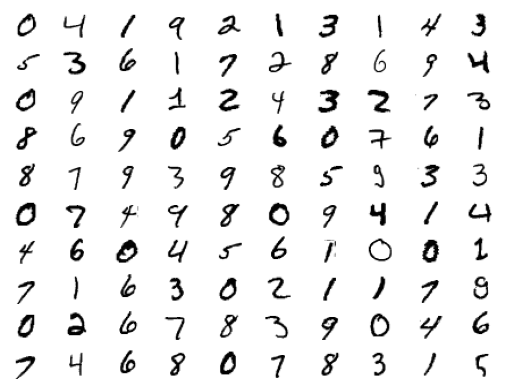

In [6]:
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 100

for index in range(1, num_of_images +1):
    plt.subplot(10, 10, index)
    plt.axis('off')
    plt.imshow(trainset.data[index], cmap = 'gray_r')

# Create data loader

- A **data loader** is used to feed data from the training dataset into the neural network during training.
- The `torch.utils.data.DataLoader` function creates a data loader object.
- Parameters like `batch_size`, `shuffle`, and `num_workers` can be set when creating the data loader.
- The `batch_size` determines the number of samples in each batch of data.
- Setting `shuffle=True` randomizes the order of the data within each epoch.
- The `num_workers` parameter controls the number of CPU cores used for data loading.
- Data loaders can be created for both the training and test datasets.
- Using the `iter` function on the data loader creates an **iterator** object to access the data.
- Calling `next(iterator)` returns the next batch of data from the iterator.
- The size of the batch can be printed using the `data.shape` command.
- The batch contains both the **images** and their corresponding **labels**.
- PyTorch tensors are used to store the images and labels.
- Another way to plot images is by using `torchvision.utils.make_grid()` along with `plt.imshow()`.
- Labels can be extracted from the batch and printed using a list comprehension.
- Batches of data are used in **mini-batch gradient descent** for training the neural network.

In [7]:
trainloader = torch.utils.data.DataLoader(trainset,
                                           batch_size = 128,
                                           shuffle = True,
                                           num_workers = 0)

testloader = torch.utils.data.DataLoader(testset,
                                          batch_size = 128,
                                          shuffle = False,
                                          num_workers = 0)

# Build the model

- **Building a CNN** involves using different building blocks like convolutional layers, ReLU activation, max pooling, fully connected layers, and softmax.
- PyTorch allows low-level control over these building blocks, providing a deeper understanding of CNNs and the training process.
- The CNN architecture for the example discussed includes convolutional layers, max pooling, and fully connected layers.
- The architecture starts with an input image of size 28x28x1 (grayscale).
- Convolutional layers with specified parameters (input channels, output channels, kernel size, stride, and padding) are used to extract features.
- Max pooling reduces the spatial dimensions while retaining the feature maps.
- Fully connected layers connect the flattened feature maps to the output layer.
- The PyTorch modules used to create the CNN are imported from `torch.nn` and `torch.nn.functional`.
- The CNN architecture is defined as a class `Net` inheriting from `torch.nn.Module`.
- The `__init__` function initializes the class and creates the layers.
- The `forward` function specifies the forward pass of the CNN, linking the layers together.
- PyTorch provides various activation functions and convenient functions in `torch.nn.functional` (F).
- The `view` function is used to reshape tensors, and `-1` allows flexibility in the number of rows.
- The `torch.device` specifies whether the operations will be performed on CPU or GPU.
- A CNN object is created, and the model summary is printed.

In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
net.to(device)
        

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

# Define optimizer and loss function

- **Loss function** and **optimizer** are integral components of the CNN training process.
- The **loss function** measures the discrepancy between predicted and actual values and is used for backpropagation.
- Cross entropy loss is commonly used in classification problems, like the one discussed.
- The **optimizer** adjusts the weights of the network based on the loss to improve the model's performance.
- **Stochastic gradient descent (SGD)** is an optimization algorithm often used in deep learning.
- The learning rate parameter controls the step size during optimization.
- Momentum is a technique used to accelerate SGD in the relevant direction and dampen oscillations.
- In the code, the `torch.optim` module is imported as `optim`.
- The optimizer is created using `optim.SGD`, specifying the network parameters, learning rate, and momentum.
- The **criterion** is the loss function, and `nn.CrossEntropyLoss()` is used for the example.

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr= 0.0001, momentum = 0.9)

# Train the model

- Data is obtained in **batches**, and the goal is to pass all the data through the network.
- Gradients are **initialized to zero** before optimization starts.
- **Forward propagation** involves passing inputs through the network to obtain outputs.
- The loss function is applied to the **outputs and actual labels** to calculate the loss.
- **Backpropagation updates** the gradients using the loss information.
- The optimizer's **step function is used to update the weights** based on the gradients.
- The training process is typically repeated for **multiple epochs**.
- Epochs determine how many times the **entire dataset** is passed through the network.
- A **running loss is kept to track** the loss during each epoch.
- Accuracy can also be monitored during training using test data.
- Accuracy is calculated by comparing the **predicted classes with the actual labels**.
- The training loop prints out information at regular intervals, such as **loss** and **accuracy**.
- The loss and accuracy values are **stored in lists** for further analysis and visualization.
- The code includes additional elements like the number of epochs, empty lists, and progress tracking.
- The model's performance **improves over epochs**, as indicated by decreasing loss and increasing accuracy.

In [10]:
epochs = 10

epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):  
    print(f'Starting Epoch: {epoch+1}...')

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs) 
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step() 

        running_loss += loss.item()
        if i % 50 == 49:    
            correct = 0 
            total = 0 

            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    images = images.to(device)
                    labels = labels.to(device)
                    
                    outputs = net(images)

                    _, predicted = torch.max(outputs.data, dim = 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct / total
                epoch_num = epoch + 1
                actual_loss = running_loss / 50
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
                running_loss = 0.0

    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print('Finished Training')
                
                
                

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, Loss: 2.296, Test Accuracy = 15.820%
Epoch: 1, Mini-Batches Completed: 100, Loss: 2.285, Test Accuracy = 15.880%
Epoch: 1, Mini-Batches Completed: 150, Loss: 2.275, Test Accuracy = 17.000%
Epoch: 1, Mini-Batches Completed: 200, Loss: 2.263, Test Accuracy = 21.090%
Epoch: 1, Mini-Batches Completed: 250, Loss: 2.252, Test Accuracy = 26.260%
Epoch: 1, Mini-Batches Completed: 300, Loss: 2.240, Test Accuracy = 32.550%
Epoch: 1, Mini-Batches Completed: 350, Loss: 2.226, Test Accuracy = 39.740%
Epoch: 1, Mini-Batches Completed: 400, Loss: 2.212, Test Accuracy = 49.320%
Epoch: 1, Mini-Batches Completed: 450, Loss: 2.192, Test Accuracy = 47.830%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, Loss: 2.167, Test Accuracy = 49.090%
Epoch: 2, Mini-Batches Completed: 100, Loss: 2.144, Test Accuracy = 51.790%
Epoch: 2, Mini-Batches Completed: 150, Loss: 2.122, Test Accuracy = 52.290%
Epoch: 2, Mini-Batches Completed: 200, Loss: 2.0

# Save the model

- After training the CNN model, we can **save it using the `torch.save()` function**. It requires specifying the model object and the file path where the model will be saved.
- The saved model includes the **model structure** as well as the **learned weights**, making it portable and reusable on different devices.
- To reload the saved model, we create an instance of the model class, move it to the appropriate device, and then load the saved weights using **`torch.load()`**.
- Once the model is loaded, we can use it to **make predictions on new data**.
- In the example, test images from the dataset are used to demonstrate how to obtain predictions from the trained model.
- The test images are loaded, processed, and passed through the model to obtain the predicted class labels.
- The predictions can be displayed, and in this case, they are **compared to the ground truth labels** for verification.
- The accuracy of the model on the test data is calculated and displayed.

In [13]:
path = './mnist_cnn_pytorch_model.pt'
torch.save(net.state_dict(), path)

In [14]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

    
    dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ''.join('%1s' % labels[j].numpy() for j in range(len(labels))))


NameError: name 'dataiter' is not defined

In [15]:
net = Net()
net.to(device)

net.load_state_dict(torch.load(path))

<All keys matched successfully>

In [16]:
test_iter = iter(testloader)
images, labels = next(test_iter)

images = images.to(device)
labels = labels.to(device)

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ''.join('%1s' % predicted[j].cpu().numpy() for j in range(len(predicted))))


Predicted:  72104149690690159734966540740131367271211742353244635560419578437464307029173797762784736136431417696054992194813974449254764905


In [17]:
correct = 0 
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.3}%')

Accuracy of the network on the 10000 test images: 91.1%


# Plot performance

- Created **empty lists**, `epoch_loss_log` and `accuracy_log`, to store the loss and accuracy values at each epoch during training.
- After each epoch, calculated the **average loss and accuracy** and appended them to the respective lists.
- Used the `matplotlib` library to create **subplots for loss and accuracy**.
- The **loss** values were plotted on the **primary y-axis**, while the **accuracy** values were plotted on the **secondary y-axis**.
- The **x-axis** represented the **number of epochs**.
- The resulting plots showed the decrease in loss and the increase in accuracy over the training epochs, indicating the model's progress.
- Can extend the plotting to include training loss and accuracy if desired, by modifying the training code to store those values as well.

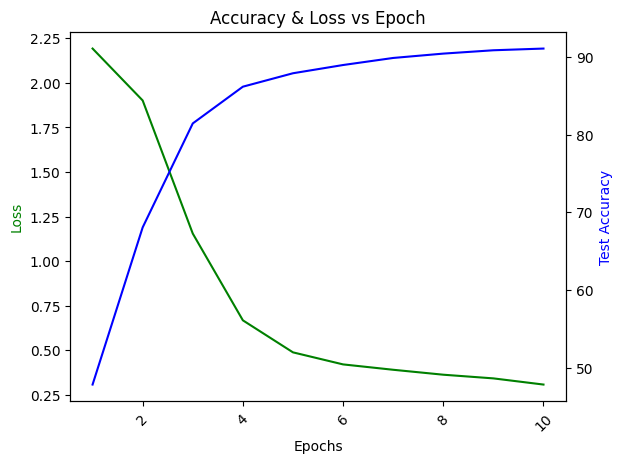

In [18]:
fig, ax1 = plt.subplots()

plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation=45)

ax2 = ax1.twinx()

ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()

# Identifying Misclassifications in PyTorch CNN

## Introduction
- In this study, we will explore the process of **identifying misclassifications** in the MNIST Handwritten Digit Recognition project using **PyTorch CNN**.
- The project involves training a **Convolutional Neural Network (CNN)** to accurately recognize handwritten digits from the **MNIST dataset**.

## 1. Setting Up the Environment
- Import the necessary PyTorch functions and set up the environment to utilize the GPU for faster computation.

## 2. Loading the Test Data
- Use the MNIST test dataset to evaluate the performance of our trained model.
- Load the test data using PyTorch's `DataLoader`.
- Apply transformations to normalize the images and convert them into tensors.

## 3. Loading the Trained Model
- Define the model architecture in a custom class.
- Load the state dictionary of the trained model using `torch.load()`.

## 4. Running Inference
- Pass each batch of test images through the CNN model.
- Obtain the predicted outputs.
- Compare the predictions with the actual labels to calculate the accuracy.

## 5. Identifying Misclassifications
- Examine each prediction to identify misclassifications made by the model.
- Print the actual label and the predicted label for each misclassified image.

## 6. Evaluation
- Evaluate the model's performance on the test dataset.
- Report the overall accuracy achieved by the model.

## 7. Confusion Matrix
- Generate a confusion matrix to visualize the performance of the model in detail.
- The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives for each class.

## 8. Classification Report
- Generate a classification report providing precision, recall, F1-score, and support for each class.
- The classification report summarizes the model's performance for individual classes.

### Import Torch and Torchvision

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [4]:
print(f"GPU is available {torch.cuda.is_available()}")

GPU is available False


### Define plot image function

In [5]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

def imshow(title="", image = None, size = 6):
    if image.any():
        w, h= image.shape[0], image.shape[1]
        aspect_ratio = w/h
        plt.figure(figsize=(size*aspect_ratio,size))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.show()
        
    else:
        print("Image not found")

### Load and transform MNIST dataset

In [13]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5),(0.5))])

testset = torchvision.datasets.MNIST('mnist',
                                    train = False,
                                    download = True,
                                    transform = transform)

testloader = torch.utils.data.DataLoader(testset,
                                        batch_size = 128,
                                        shuffle = False,
                                        num_workers = 0)

print("Dataset downloaded successfully!")


Dataset downloaded successfully!


### Create Model def class

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
net.to(device)
        

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [18]:
path = './mnist_cnn_pytorch_model.pt'
net.load_state_dict(torch.load(path))

<All keys matched successfully>

### Calculate accuracy

In [22]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
        
accuracy = 100*correct/total
print(f"Accuracy:{accuracy}")

Accuracy:91.07


### Visualize misclassified datas

Actual Label: 5, Predicted Label: 6


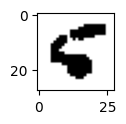

Actual Label: 4, Predicted Label: 6


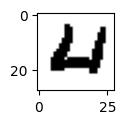

Actual Label: 1, Predicted Label: 3


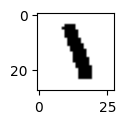

Actual Label: 9, Predicted Label: 4


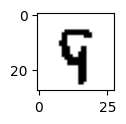

Actual Label: 2, Predicted Label: 7


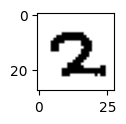

Actual Label: 9, Predicted Label: 4


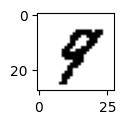

Actual Label: 7, Predicted Label: 1


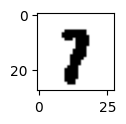

Actual Label: 7, Predicted Label: 4


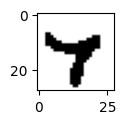

Actual Label: 2, Predicted Label: 9


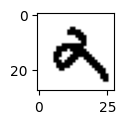

Actual Label: 9, Predicted Label: 3


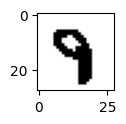

Actual Label: 3, Predicted Label: 2


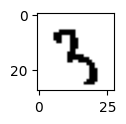

Actual Label: 6, Predicted Label: 5


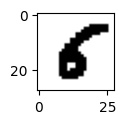

Actual Label: 8, Predicted Label: 7


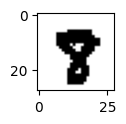

Actual Label: 9, Predicted Label: 8


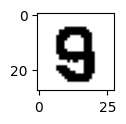

Actual Label: 3, Predicted Label: 5


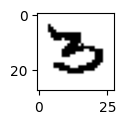

Actual Label: 4, Predicted Label: 6


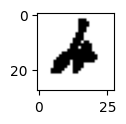

Actual Label: 4, Predicted Label: 9


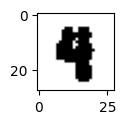

Actual Label: 6, Predicted Label: 0


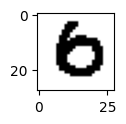

Actual Label: 8, Predicted Label: 4


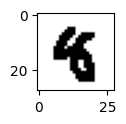

Actual Label: 8, Predicted Label: 3


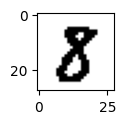

Actual Label: 4, Predicted Label: 6


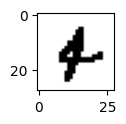

Actual Label: 7, Predicted Label: 9


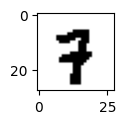

Actual Label: 3, Predicted Label: 5


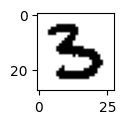

Actual Label: 2, Predicted Label: 3


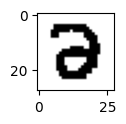

Actual Label: 9, Predicted Label: 1


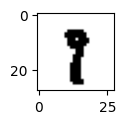

Actual Label: 2, Predicted Label: 7


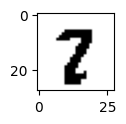

Actual Label: 5, Predicted Label: 3


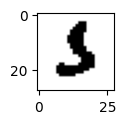

Actual Label: 6, Predicted Label: 4


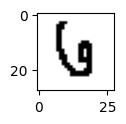

Actual Label: 3, Predicted Label: 7


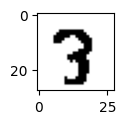

Actual Label: 5, Predicted Label: 0


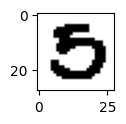

Actual Label: 2, Predicted Label: 7


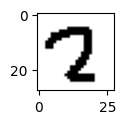

Actual Label: 3, Predicted Label: 7


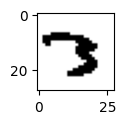

Actual Label: 8, Predicted Label: 9


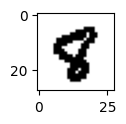

Actual Label: 5, Predicted Label: 8


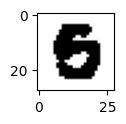

Actual Label: 5, Predicted Label: 3


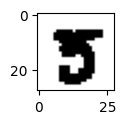

Actual Label: 8, Predicted Label: 7


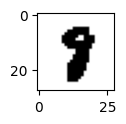

Actual Label: 0, Predicted Label: 5


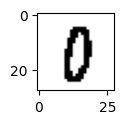

Actual Label: 2, Predicted Label: 8


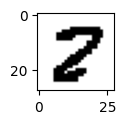

Actual Label: 6, Predicted Label: 0


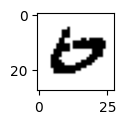

Actual Label: 9, Predicted Label: 8


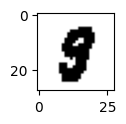

Actual Label: 3, Predicted Label: 5


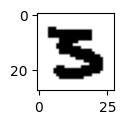

Actual Label: 6, Predicted Label: 5


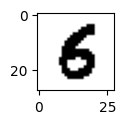

Actual Label: 3, Predicted Label: 7


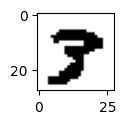

Actual Label: 7, Predicted Label: 2


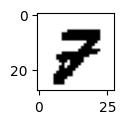

Actual Label: 5, Predicted Label: 2


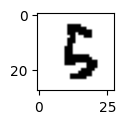

Actual Label: 9, Predicted Label: 3


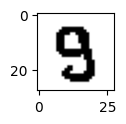

Actual Label: 5, Predicted Label: 3


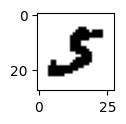

Actual Label: 3, Predicted Label: 5


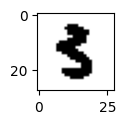

Actual Label: 4, Predicted Label: 1


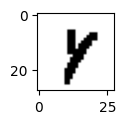

Actual Label: 3, Predicted Label: 5


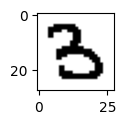

Actual Label: 3, Predicted Label: 2


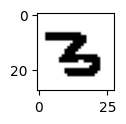

Actual Label: 3, Predicted Label: 6


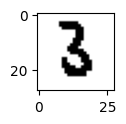

Actual Label: 2, Predicted Label: 1


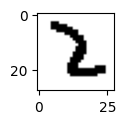

Actual Label: 8, Predicted Label: 4


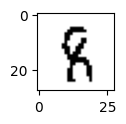

Actual Label: 8, Predicted Label: 3


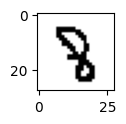

Actual Label: 7, Predicted Label: 1


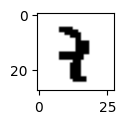

Actual Label: 8, Predicted Label: 6


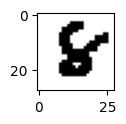

Actual Label: 4, Predicted Label: 9


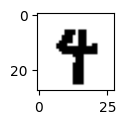

Actual Label: 3, Predicted Label: 5


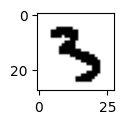

Actual Label: 3, Predicted Label: 8


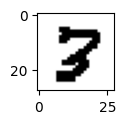

Actual Label: 8, Predicted Label: 2


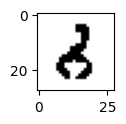

Actual Label: 8, Predicted Label: 3


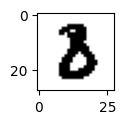

Actual Label: 3, Predicted Label: 5


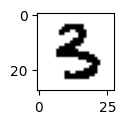

Actual Label: 7, Predicted Label: 9


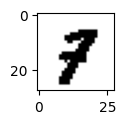

Actual Label: 8, Predicted Label: 3


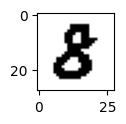

Actual Label: 4, Predicted Label: 6


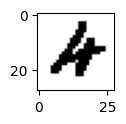

Actual Label: 2, Predicted Label: 8


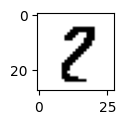

Actual Label: 1, Predicted Label: 8


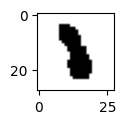

Actual Label: 2, Predicted Label: 1


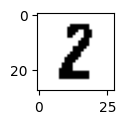

Actual Label: 3, Predicted Label: 9


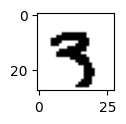

Actual Label: 2, Predicted Label: 6


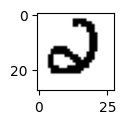

Actual Label: 5, Predicted Label: 7


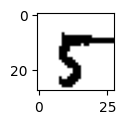

Actual Label: 7, Predicted Label: 4


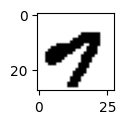

Actual Label: 2, Predicted Label: 9


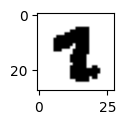

Actual Label: 0, Predicted Label: 3


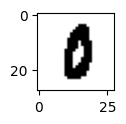

Actual Label: 7, Predicted Label: 1


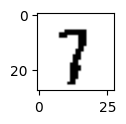

Actual Label: 7, Predicted Label: 2


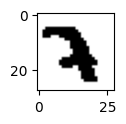

Actual Label: 8, Predicted Label: 4


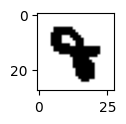

Actual Label: 4, Predicted Label: 9


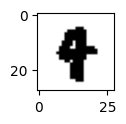

Actual Label: 8, Predicted Label: 5


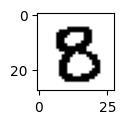

Actual Label: 0, Predicted Label: 6


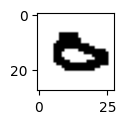

Actual Label: 5, Predicted Label: 8


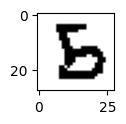

Actual Label: 2, Predicted Label: 8


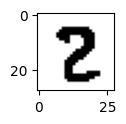

Actual Label: 2, Predicted Label: 8


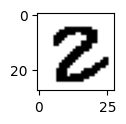

Actual Label: 4, Predicted Label: 9


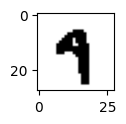

Actual Label: 4, Predicted Label: 9


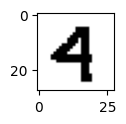

Actual Label: 8, Predicted Label: 5


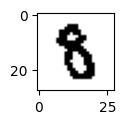

Actual Label: 5, Predicted Label: 9


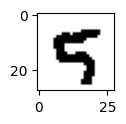

Actual Label: 8, Predicted Label: 5


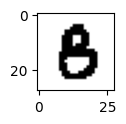

Actual Label: 8, Predicted Label: 3


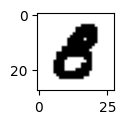

Actual Label: 8, Predicted Label: 7


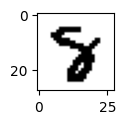

Actual Label: 5, Predicted Label: 3


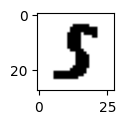

Actual Label: 4, Predicted Label: 9


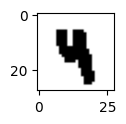

Actual Label: 9, Predicted Label: 7


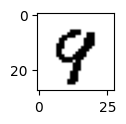

Actual Label: 7, Predicted Label: 2


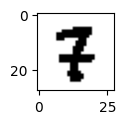

Actual Label: 2, Predicted Label: 7


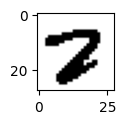

Actual Label: 3, Predicted Label: 5


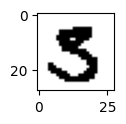

Actual Label: 2, Predicted Label: 0


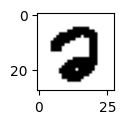

Actual Label: 3, Predicted Label: 5


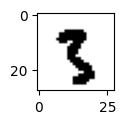

Actual Label: 8, Predicted Label: 9


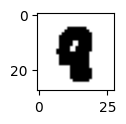

Actual Label: 7, Predicted Label: 2


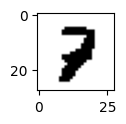

Actual Label: 1, Predicted Label: 6


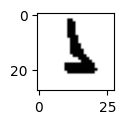

Actual Label: 4, Predicted Label: 5


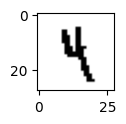

Actual Label: 6, Predicted Label: 0


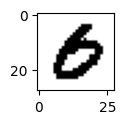

Actual Label: 2, Predicted Label: 3


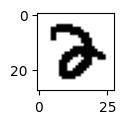

Actual Label: 3, Predicted Label: 8


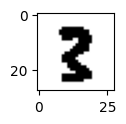

Actual Label: 9, Predicted Label: 7


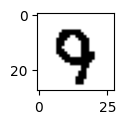

Actual Label: 9, Predicted Label: 7


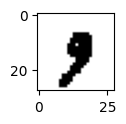

Actual Label: 5, Predicted Label: 3


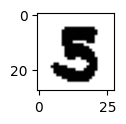

Actual Label: 7, Predicted Label: 9


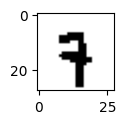

Actual Label: 6, Predicted Label: 5


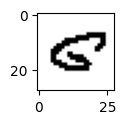

Actual Label: 5, Predicted Label: 8


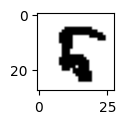

Actual Label: 6, Predicted Label: 8


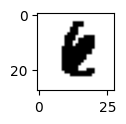

Actual Label: 2, Predicted Label: 5


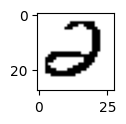

Actual Label: 3, Predicted Label: 9


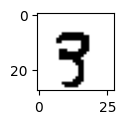

Actual Label: 8, Predicted Label: 4


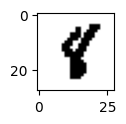

Actual Label: 5, Predicted Label: 3


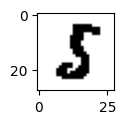

Actual Label: 7, Predicted Label: 2


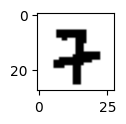

Actual Label: 7, Predicted Label: 9


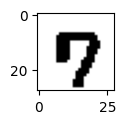

Actual Label: 8, Predicted Label: 2


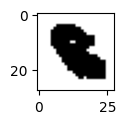

Actual Label: 9, Predicted Label: 3


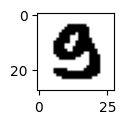

Actual Label: 4, Predicted Label: 6


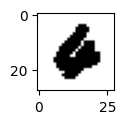

Actual Label: 3, Predicted Label: 8


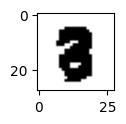

Actual Label: 7, Predicted Label: 2


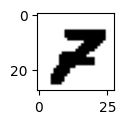

Actual Label: 3, Predicted Label: 7


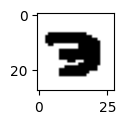

Actual Label: 7, Predicted Label: 9


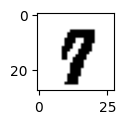

Actual Label: 6, Predicted Label: 1


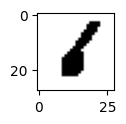

Actual Label: 0, Predicted Label: 6


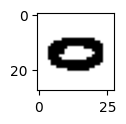

Actual Label: 9, Predicted Label: 4


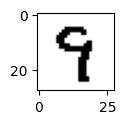

Actual Label: 7, Predicted Label: 9


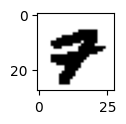

Actual Label: 8, Predicted Label: 4


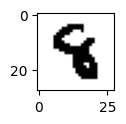

Actual Label: 8, Predicted Label: 5


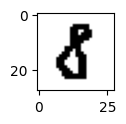

Actual Label: 8, Predicted Label: 5


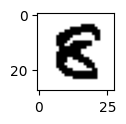

Actual Label: 3, Predicted Label: 8


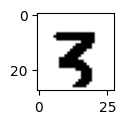

Actual Label: 7, Predicted Label: 2


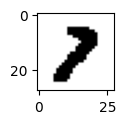

Actual Label: 3, Predicted Label: 5


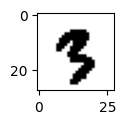

Actual Label: 9, Predicted Label: 7


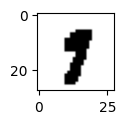

Actual Label: 2, Predicted Label: 6


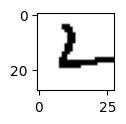

Actual Label: 7, Predicted Label: 2


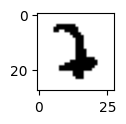

Actual Label: 9, Predicted Label: 8


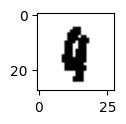

Actual Label: 5, Predicted Label: 6


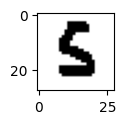

Actual Label: 8, Predicted Label: 5


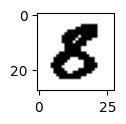

Actual Label: 4, Predicted Label: 9


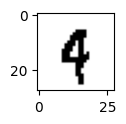

Actual Label: 9, Predicted Label: 0


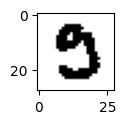

Actual Label: 8, Predicted Label: 5


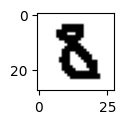

Actual Label: 2, Predicted Label: 7


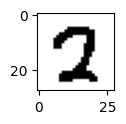

Actual Label: 7, Predicted Label: 1


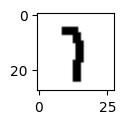

Actual Label: 2, Predicted Label: 6


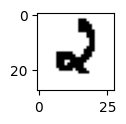

Actual Label: 4, Predicted Label: 9


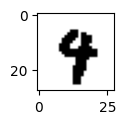

Actual Label: 7, Predicted Label: 2


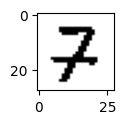

Actual Label: 5, Predicted Label: 4


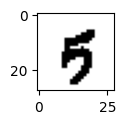

Actual Label: 3, Predicted Label: 5


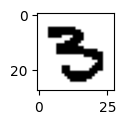

Actual Label: 5, Predicted Label: 7


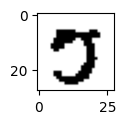

Actual Label: 9, Predicted Label: 7


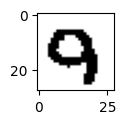

Actual Label: 3, Predicted Label: 5


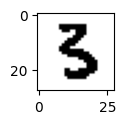

Actual Label: 8, Predicted Label: 3


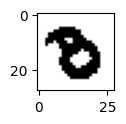

Actual Label: 8, Predicted Label: 1


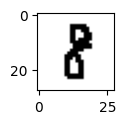

Actual Label: 7, Predicted Label: 2


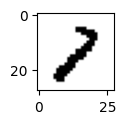

Actual Label: 2, Predicted Label: 6


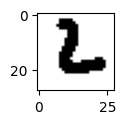

Actual Label: 2, Predicted Label: 6


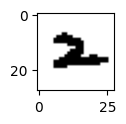

Actual Label: 8, Predicted Label: 2


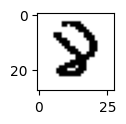

Actual Label: 2, Predicted Label: 8


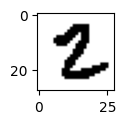

Actual Label: 3, Predicted Label: 7


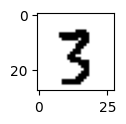

Actual Label: 5, Predicted Label: 3


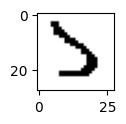

Actual Label: 8, Predicted Label: 3


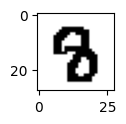

Actual Label: 0, Predicted Label: 8


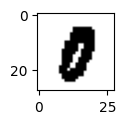

Actual Label: 2, Predicted Label: 1


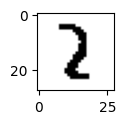

Actual Label: 2, Predicted Label: 6


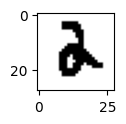

Actual Label: 9, Predicted Label: 4


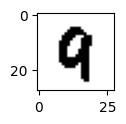

Actual Label: 8, Predicted Label: 3


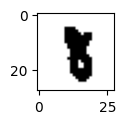

Actual Label: 6, Predicted Label: 7


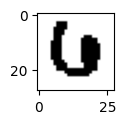

Actual Label: 4, Predicted Label: 9


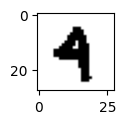

Actual Label: 8, Predicted Label: 3


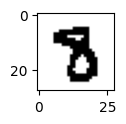

Actual Label: 4, Predicted Label: 1


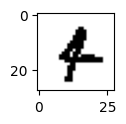

Actual Label: 5, Predicted Label: 9


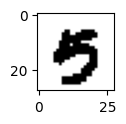

Actual Label: 3, Predicted Label: 2


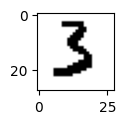

Actual Label: 5, Predicted Label: 0


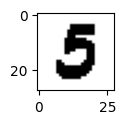

Actual Label: 7, Predicted Label: 1


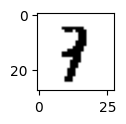

Actual Label: 2, Predicted Label: 8


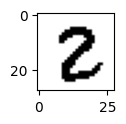

Actual Label: 7, Predicted Label: 9


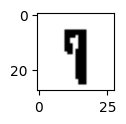

Actual Label: 5, Predicted Label: 0


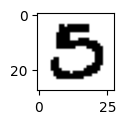

Actual Label: 1, Predicted Label: 6


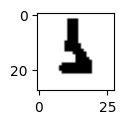

Actual Label: 8, Predicted Label: 7


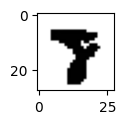

Actual Label: 4, Predicted Label: 6


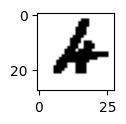

Actual Label: 9, Predicted Label: 8


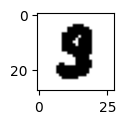

Actual Label: 9, Predicted Label: 7


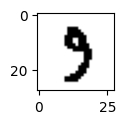

Actual Label: 7, Predicted Label: 9


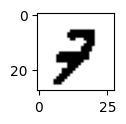

Actual Label: 6, Predicted Label: 5


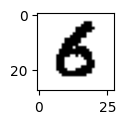

Actual Label: 2, Predicted Label: 6


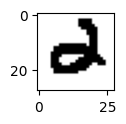

Actual Label: 0, Predicted Label: 6


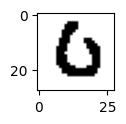

Actual Label: 6, Predicted Label: 5


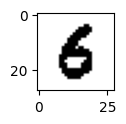

Actual Label: 4, Predicted Label: 7


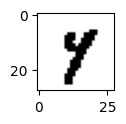

Actual Label: 9, Predicted Label: 4


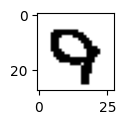

Actual Label: 2, Predicted Label: 7


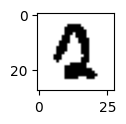

Actual Label: 3, Predicted Label: 7


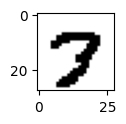

Actual Label: 8, Predicted Label: 5


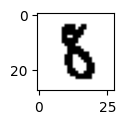

Actual Label: 8, Predicted Label: 1


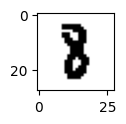

Actual Label: 9, Predicted Label: 7


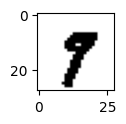

Actual Label: 2, Predicted Label: 9


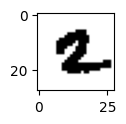

Actual Label: 9, Predicted Label: 5


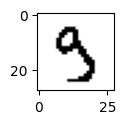

Actual Label: 7, Predicted Label: 1


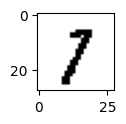

Actual Label: 8, Predicted Label: 0


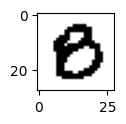

Actual Label: 7, Predicted Label: 2


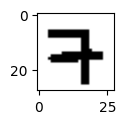

Actual Label: 2, Predicted Label: 4


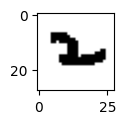

Actual Label: 3, Predicted Label: 7


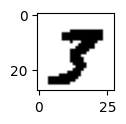

Actual Label: 7, Predicted Label: 2


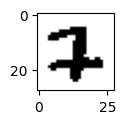

Actual Label: 8, Predicted Label: 6


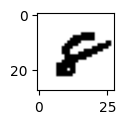

Actual Label: 3, Predicted Label: 5


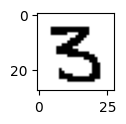

Actual Label: 7, Predicted Label: 4


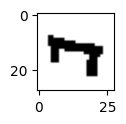

Actual Label: 8, Predicted Label: 5


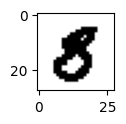

Actual Label: 8, Predicted Label: 2


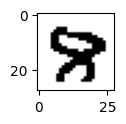

Actual Label: 2, Predicted Label: 9


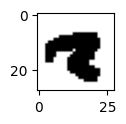

Actual Label: 6, Predicted Label: 4


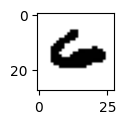

Actual Label: 8, Predicted Label: 5


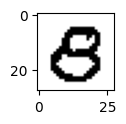

Actual Label: 8, Predicted Label: 9


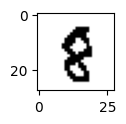

Actual Label: 8, Predicted Label: 7


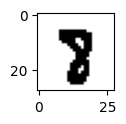

Actual Label: 8, Predicted Label: 9


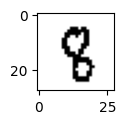

Actual Label: 6, Predicted Label: 4


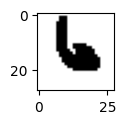

Actual Label: 8, Predicted Label: 3


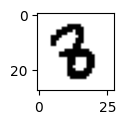

Actual Label: 8, Predicted Label: 3


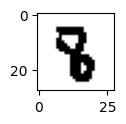

Actual Label: 9, Predicted Label: 4


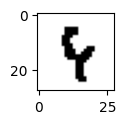

Actual Label: 7, Predicted Label: 4


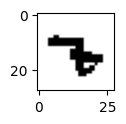

Actual Label: 5, Predicted Label: 8


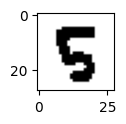

Actual Label: 3, Predicted Label: 5


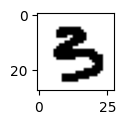

Actual Label: 2, Predicted Label: 4


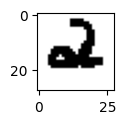

Actual Label: 4, Predicted Label: 6


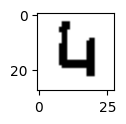

Actual Label: 9, Predicted Label: 5


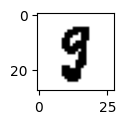

Actual Label: 8, Predicted Label: 2


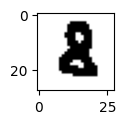

Actual Label: 4, Predicted Label: 9


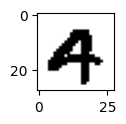

Actual Label: 5, Predicted Label: 3


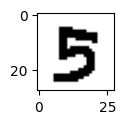

Actual Label: 8, Predicted Label: 5


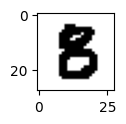

Actual Label: 6, Predicted Label: 4


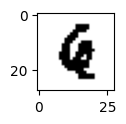

Actual Label: 6, Predicted Label: 5


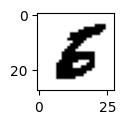

Actual Label: 7, Predicted Label: 2


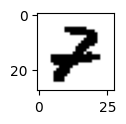

Actual Label: 7, Predicted Label: 9


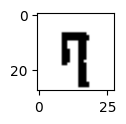

Actual Label: 5, Predicted Label: 3


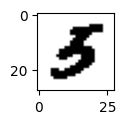

Actual Label: 5, Predicted Label: 4


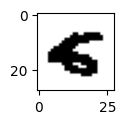

Actual Label: 4, Predicted Label: 8


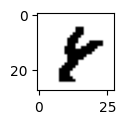

Actual Label: 2, Predicted Label: 7


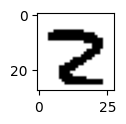

Actual Label: 8, Predicted Label: 4


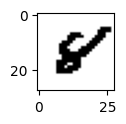

Actual Label: 4, Predicted Label: 9


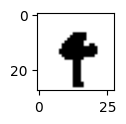

Actual Label: 9, Predicted Label: 4


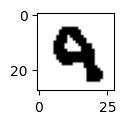

Actual Label: 7, Predicted Label: 9


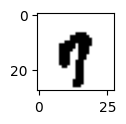

Actual Label: 8, Predicted Label: 1


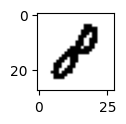

Actual Label: 2, Predicted Label: 0


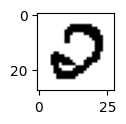

Actual Label: 3, Predicted Label: 7


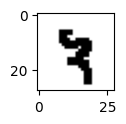

Actual Label: 2, Predicted Label: 8


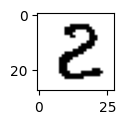

Actual Label: 7, Predicted Label: 0


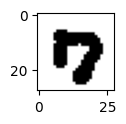

Actual Label: 6, Predicted Label: 3


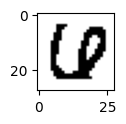

Actual Label: 9, Predicted Label: 2


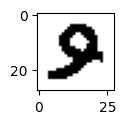

Actual Label: 4, Predicted Label: 9


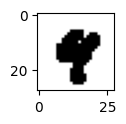

Actual Label: 6, Predicted Label: 1


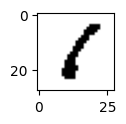

Actual Label: 2, Predicted Label: 8


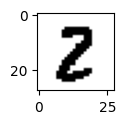

Actual Label: 3, Predicted Label: 5


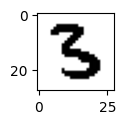

Actual Label: 8, Predicted Label: 3


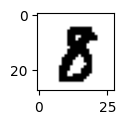

Actual Label: 8, Predicted Label: 2


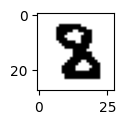

Actual Label: 1, Predicted Label: 2


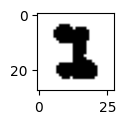

Actual Label: 4, Predicted Label: 6


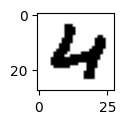

Actual Label: 0, Predicted Label: 5


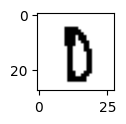

Actual Label: 2, Predicted Label: 5


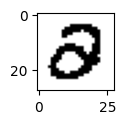

Actual Label: 9, Predicted Label: 1


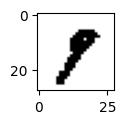

Actual Label: 5, Predicted Label: 3


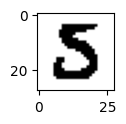

Actual Label: 8, Predicted Label: 3


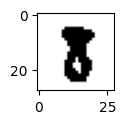

Actual Label: 6, Predicted Label: 2


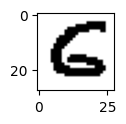

Actual Label: 5, Predicted Label: 6


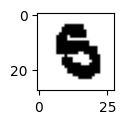

Actual Label: 9, Predicted Label: 4


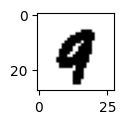

Actual Label: 1, Predicted Label: 6


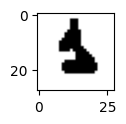

Actual Label: 2, Predicted Label: 1


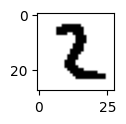

Actual Label: 8, Predicted Label: 0


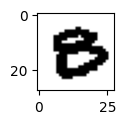

Actual Label: 9, Predicted Label: 2


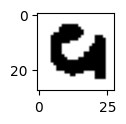

Actual Label: 2, Predicted Label: 7


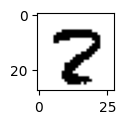

Actual Label: 3, Predicted Label: 8


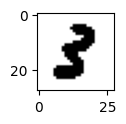

Actual Label: 9, Predicted Label: 5


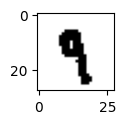

Actual Label: 7, Predicted Label: 2


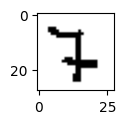

Actual Label: 3, Predicted Label: 0


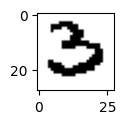

Actual Label: 5, Predicted Label: 9


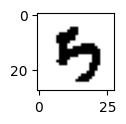

Actual Label: 4, Predicted Label: 9


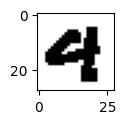

Actual Label: 2, Predicted Label: 1


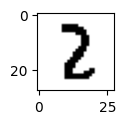

Actual Label: 0, Predicted Label: 2


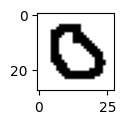

Actual Label: 9, Predicted Label: 2


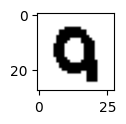

Actual Label: 8, Predicted Label: 9


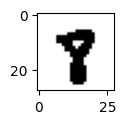

Actual Label: 9, Predicted Label: 1


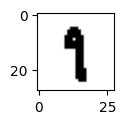

Actual Label: 8, Predicted Label: 5


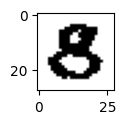

Actual Label: 4, Predicted Label: 9


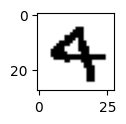

Actual Label: 8, Predicted Label: 3


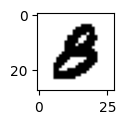

Actual Label: 4, Predicted Label: 2


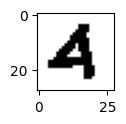

Actual Label: 9, Predicted Label: 1


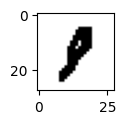

Actual Label: 3, Predicted Label: 7


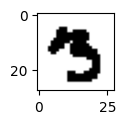

Actual Label: 6, Predicted Label: 4


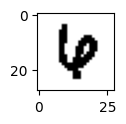

Actual Label: 8, Predicted Label: 3


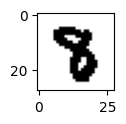

Actual Label: 0, Predicted Label: 5


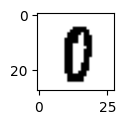

Actual Label: 1, Predicted Label: 8


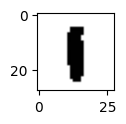

Actual Label: 2, Predicted Label: 6


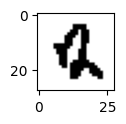

Actual Label: 7, Predicted Label: 2


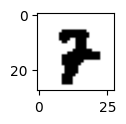

Actual Label: 5, Predicted Label: 6


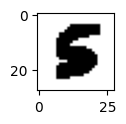

Actual Label: 5, Predicted Label: 3


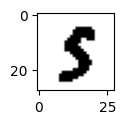

Actual Label: 5, Predicted Label: 3


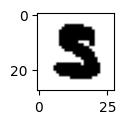

Actual Label: 6, Predicted Label: 1


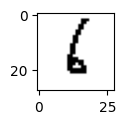

Actual Label: 3, Predicted Label: 5


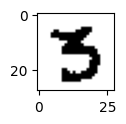

Actual Label: 5, Predicted Label: 8


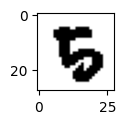

Actual Label: 5, Predicted Label: 3


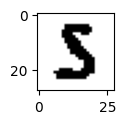

Actual Label: 3, Predicted Label: 2


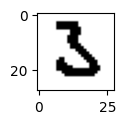

Actual Label: 5, Predicted Label: 8


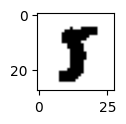

Actual Label: 5, Predicted Label: 7


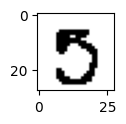

Actual Label: 7, Predicted Label: 1


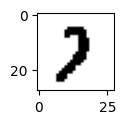

Actual Label: 9, Predicted Label: 7


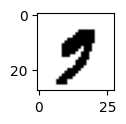

Actual Label: 5, Predicted Label: 3


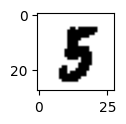

Actual Label: 8, Predicted Label: 2


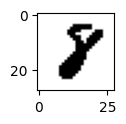

Actual Label: 7, Predicted Label: 8


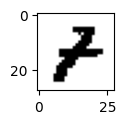

Actual Label: 2, Predicted Label: 8


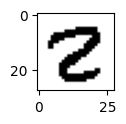

Actual Label: 7, Predicted Label: 2


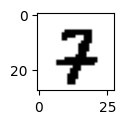

Actual Label: 0, Predicted Label: 6


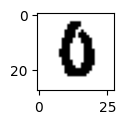

Actual Label: 2, Predicted Label: 4


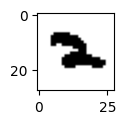

Actual Label: 9, Predicted Label: 0


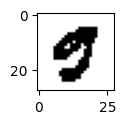

Actual Label: 6, Predicted Label: 1


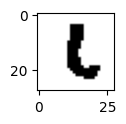

Actual Label: 7, Predicted Label: 2


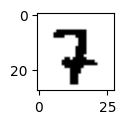

Actual Label: 5, Predicted Label: 8


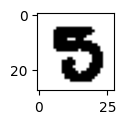

Actual Label: 3, Predicted Label: 7


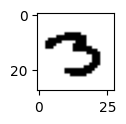

Actual Label: 7, Predicted Label: 4


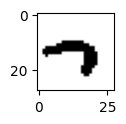

Actual Label: 1, Predicted Label: 8


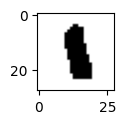

Actual Label: 0, Predicted Label: 8


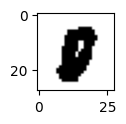

Actual Label: 4, Predicted Label: 9


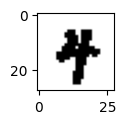

Actual Label: 7, Predicted Label: 4


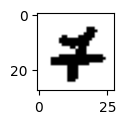

Actual Label: 9, Predicted Label: 7


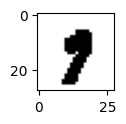

Actual Label: 6, Predicted Label: 0


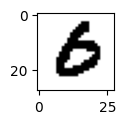

Actual Label: 3, Predicted Label: 2


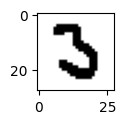

Actual Label: 3, Predicted Label: 6


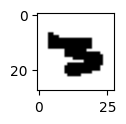

Actual Label: 2, Predicted Label: 3


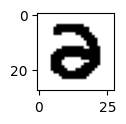

Actual Label: 5, Predicted Label: 0


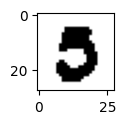

Actual Label: 7, Predicted Label: 2


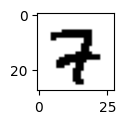

Actual Label: 5, Predicted Label: 3


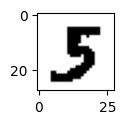

Actual Label: 4, Predicted Label: 9


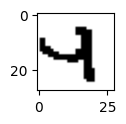

Actual Label: 5, Predicted Label: 3


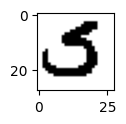

Actual Label: 7, Predicted Label: 9


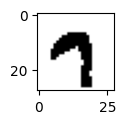

Actual Label: 6, Predicted Label: 4


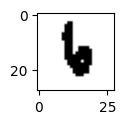

Actual Label: 8, Predicted Label: 0


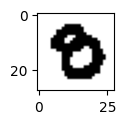

Actual Label: 8, Predicted Label: 3


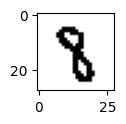

Actual Label: 3, Predicted Label: 5


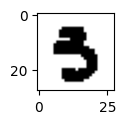

Actual Label: 4, Predicted Label: 9


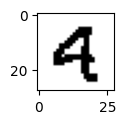

Actual Label: 3, Predicted Label: 8


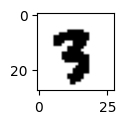

Actual Label: 5, Predicted Label: 9


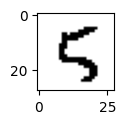

Actual Label: 5, Predicted Label: 0


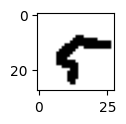

Actual Label: 3, Predicted Label: 2


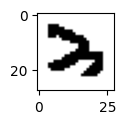

Actual Label: 3, Predicted Label: 7


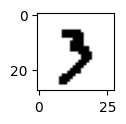

Actual Label: 3, Predicted Label: 5


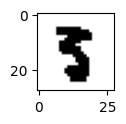

Actual Label: 5, Predicted Label: 7


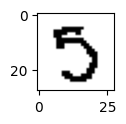

Actual Label: 8, Predicted Label: 9


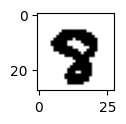

Actual Label: 6, Predicted Label: 8


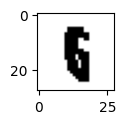

Actual Label: 9, Predicted Label: 1


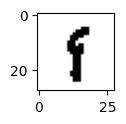

Actual Label: 9, Predicted Label: 7


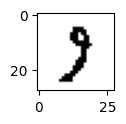

Actual Label: 8, Predicted Label: 1


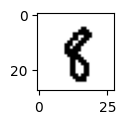

Actual Label: 1, Predicted Label: 2


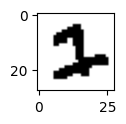

Actual Label: 3, Predicted Label: 1


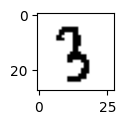

Actual Label: 3, Predicted Label: 5


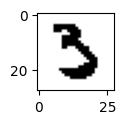

Actual Label: 4, Predicted Label: 6


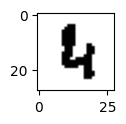

Actual Label: 5, Predicted Label: 9


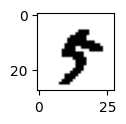

Actual Label: 6, Predicted Label: 0


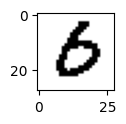

Actual Label: 1, Predicted Label: 2


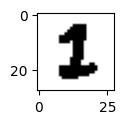

Actual Label: 4, Predicted Label: 9


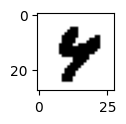

Actual Label: 7, Predicted Label: 9


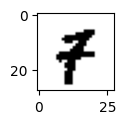

Actual Label: 8, Predicted Label: 3


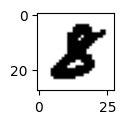

Actual Label: 5, Predicted Label: 9


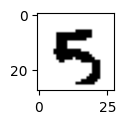

Actual Label: 3, Predicted Label: 5


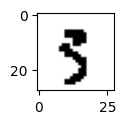

Actual Label: 2, Predicted Label: 1


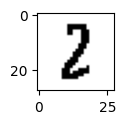

Actual Label: 5, Predicted Label: 7


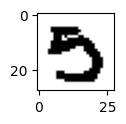

Actual Label: 9, Predicted Label: 4


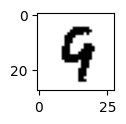

Actual Label: 7, Predicted Label: 9


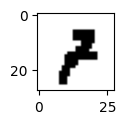

Actual Label: 3, Predicted Label: 1


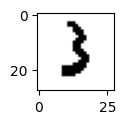

Actual Label: 2, Predicted Label: 7


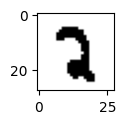

Actual Label: 7, Predicted Label: 4


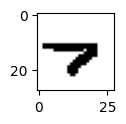

Actual Label: 3, Predicted Label: 2


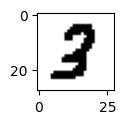

Actual Label: 8, Predicted Label: 3


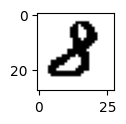

Actual Label: 6, Predicted Label: 5


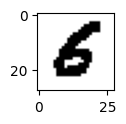

Actual Label: 7, Predicted Label: 1


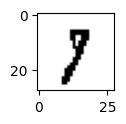

Actual Label: 9, Predicted Label: 3


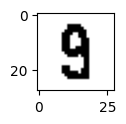

Actual Label: 8, Predicted Label: 3


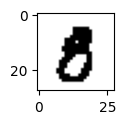

Actual Label: 6, Predicted Label: 5


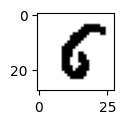

Actual Label: 6, Predicted Label: 2


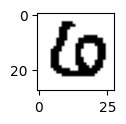

Actual Label: 4, Predicted Label: 9


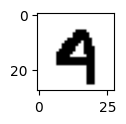

Actual Label: 6, Predicted Label: 4


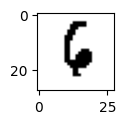

Actual Label: 7, Predicted Label: 4


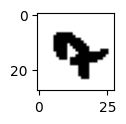

Actual Label: 8, Predicted Label: 9


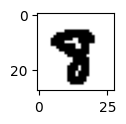

Actual Label: 7, Predicted Label: 2


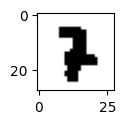

Actual Label: 2, Predicted Label: 3


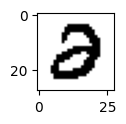

Actual Label: 7, Predicted Label: 9


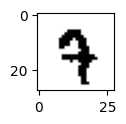

Actual Label: 0, Predicted Label: 2


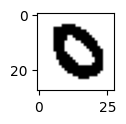

Actual Label: 9, Predicted Label: 7


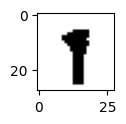

Actual Label: 7, Predicted Label: 9


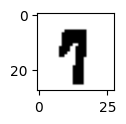

Actual Label: 9, Predicted Label: 2


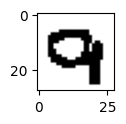

Actual Label: 4, Predicted Label: 9


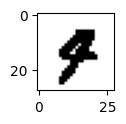

Actual Label: 5, Predicted Label: 3


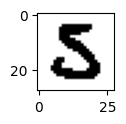

Actual Label: 4, Predicted Label: 9


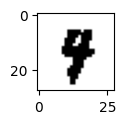

Actual Label: 2, Predicted Label: 7


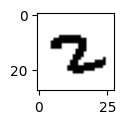

Actual Label: 4, Predicted Label: 9


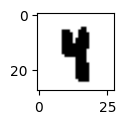

Actual Label: 3, Predicted Label: 5


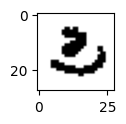

Actual Label: 0, Predicted Label: 8


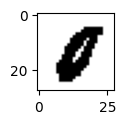

Actual Label: 3, Predicted Label: 7


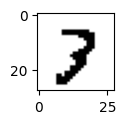

Actual Label: 4, Predicted Label: 5


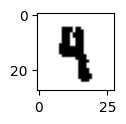

Actual Label: 9, Predicted Label: 5


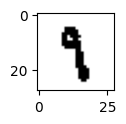

Actual Label: 5, Predicted Label: 6


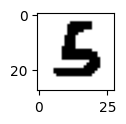

Actual Label: 2, Predicted Label: 7


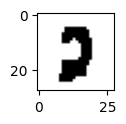

Actual Label: 8, Predicted Label: 5


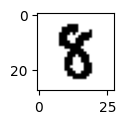

Actual Label: 6, Predicted Label: 4


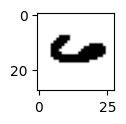

Actual Label: 4, Predicted Label: 6


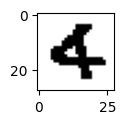

Actual Label: 3, Predicted Label: 2


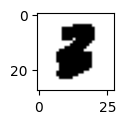

Actual Label: 5, Predicted Label: 0


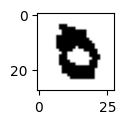

Actual Label: 8, Predicted Label: 5


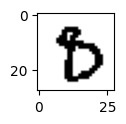

Actual Label: 8, Predicted Label: 5


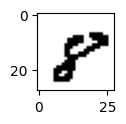

Actual Label: 7, Predicted Label: 4


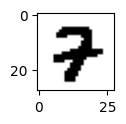

Actual Label: 2, Predicted Label: 7


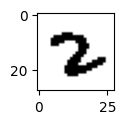

Actual Label: 7, Predicted Label: 1


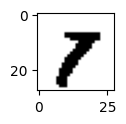

Actual Label: 9, Predicted Label: 3


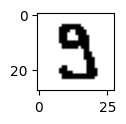

Actual Label: 1, Predicted Label: 5


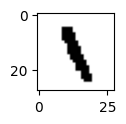

Actual Label: 7, Predicted Label: 0


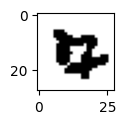

Actual Label: 8, Predicted Label: 3


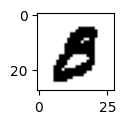

Actual Label: 8, Predicted Label: 5


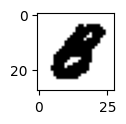

Actual Label: 9, Predicted Label: 4


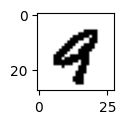

Actual Label: 2, Predicted Label: 3


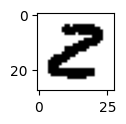

Actual Label: 5, Predicted Label: 3


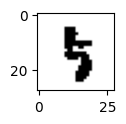

Actual Label: 9, Predicted Label: 3


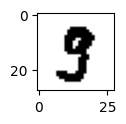

Actual Label: 4, Predicted Label: 9


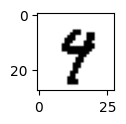

Actual Label: 6, Predicted Label: 4


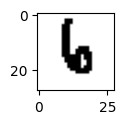

Actual Label: 4, Predicted Label: 9


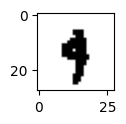

Actual Label: 7, Predicted Label: 9


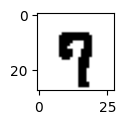

Actual Label: 8, Predicted Label: 1


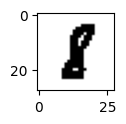

Actual Label: 7, Predicted Label: 1


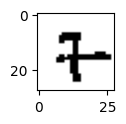

Actual Label: 4, Predicted Label: 2


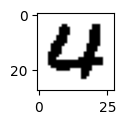

Actual Label: 8, Predicted Label: 2


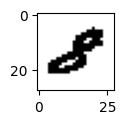

Actual Label: 7, Predicted Label: 2


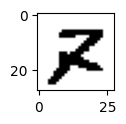

Actual Label: 3, Predicted Label: 7


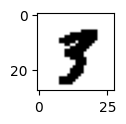

Actual Label: 5, Predicted Label: 8


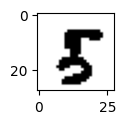

Actual Label: 4, Predicted Label: 6


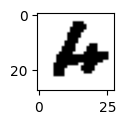

Actual Label: 2, Predicted Label: 1


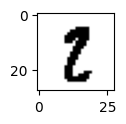

Actual Label: 6, Predicted Label: 0


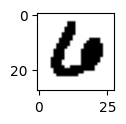

Actual Label: 5, Predicted Label: 4


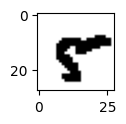

Actual Label: 7, Predicted Label: 3


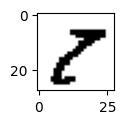

Actual Label: 2, Predicted Label: 3


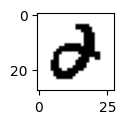

Actual Label: 2, Predicted Label: 4


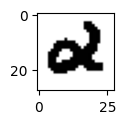

Actual Label: 0, Predicted Label: 6


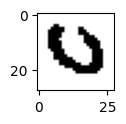

Actual Label: 9, Predicted Label: 2


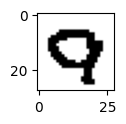

Actual Label: 9, Predicted Label: 4


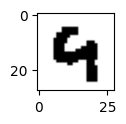

Actual Label: 8, Predicted Label: 3


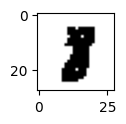

Actual Label: 7, Predicted Label: 9


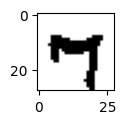

Actual Label: 7, Predicted Label: 1


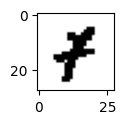

Actual Label: 2, Predicted Label: 8


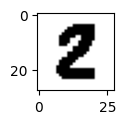

Actual Label: 6, Predicted Label: 2


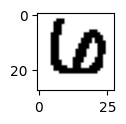

Actual Label: 7, Predicted Label: 3


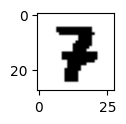

Actual Label: 9, Predicted Label: 4


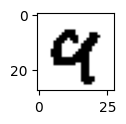

Actual Label: 6, Predicted Label: 5


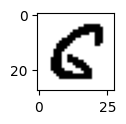

Actual Label: 5, Predicted Label: 0


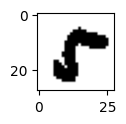

Actual Label: 2, Predicted Label: 3


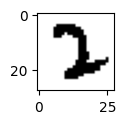

Actual Label: 9, Predicted Label: 4


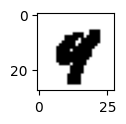

Actual Label: 8, Predicted Label: 3


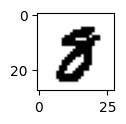

Actual Label: 2, Predicted Label: 8


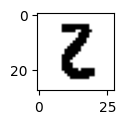

Actual Label: 9, Predicted Label: 2


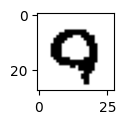

Actual Label: 9, Predicted Label: 2


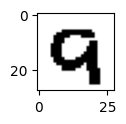

Actual Label: 5, Predicted Label: 6


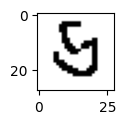

Actual Label: 5, Predicted Label: 3


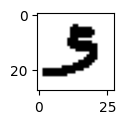

Actual Label: 1, Predicted Label: 3


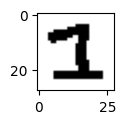

Actual Label: 9, Predicted Label: 3


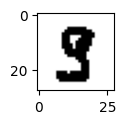

Actual Label: 4, Predicted Label: 6


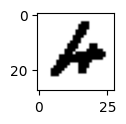

Actual Label: 3, Predicted Label: 5


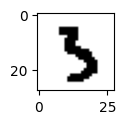

Actual Label: 2, Predicted Label: 1


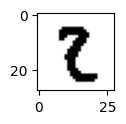

Actual Label: 8, Predicted Label: 5


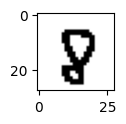

Actual Label: 8, Predicted Label: 9


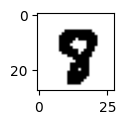

Actual Label: 3, Predicted Label: 2


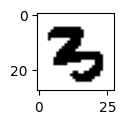

Actual Label: 7, Predicted Label: 1


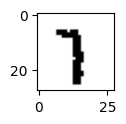

Actual Label: 9, Predicted Label: 4


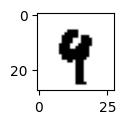

Actual Label: 9, Predicted Label: 4


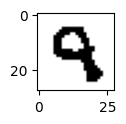

Actual Label: 4, Predicted Label: 9


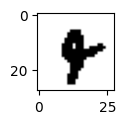

Actual Label: 3, Predicted Label: 5


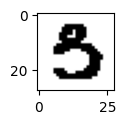

Actual Label: 5, Predicted Label: 2


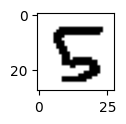

Actual Label: 6, Predicted Label: 5


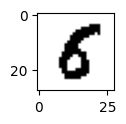

Actual Label: 0, Predicted Label: 6


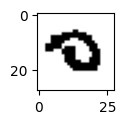

Actual Label: 8, Predicted Label: 3


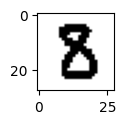

Actual Label: 5, Predicted Label: 3


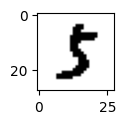

Actual Label: 8, Predicted Label: 0


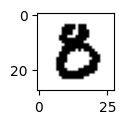

Actual Label: 9, Predicted Label: 3


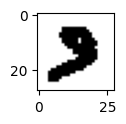

Actual Label: 9, Predicted Label: 4


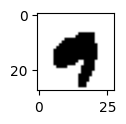

Actual Label: 9, Predicted Label: 2


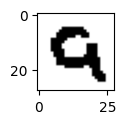

Actual Label: 5, Predicted Label: 3


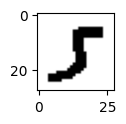

Actual Label: 8, Predicted Label: 2


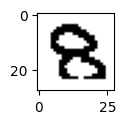

Actual Label: 8, Predicted Label: 3


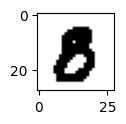

Actual Label: 5, Predicted Label: 1


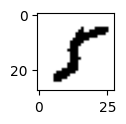

Actual Label: 9, Predicted Label: 4


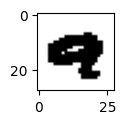

Actual Label: 2, Predicted Label: 8


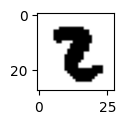

Actual Label: 8, Predicted Label: 3


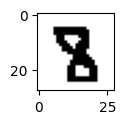

Actual Label: 9, Predicted Label: 0


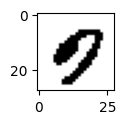

Actual Label: 2, Predicted Label: 4


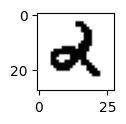

Actual Label: 2, Predicted Label: 4


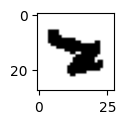

Actual Label: 1, Predicted Label: 5


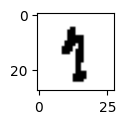

Actual Label: 6, Predicted Label: 4


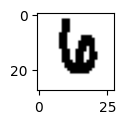

Actual Label: 2, Predicted Label: 3


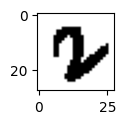

Actual Label: 6, Predicted Label: 5


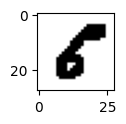

Actual Label: 1, Predicted Label: 3


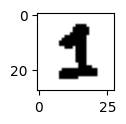

Actual Label: 9, Predicted Label: 7


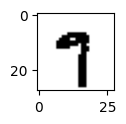

Actual Label: 7, Predicted Label: 2


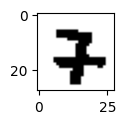

Actual Label: 7, Predicted Label: 9


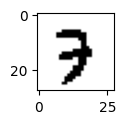

Actual Label: 6, Predicted Label: 5


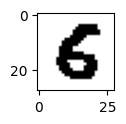

Actual Label: 2, Predicted Label: 1


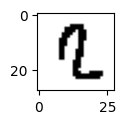

Actual Label: 3, Predicted Label: 0


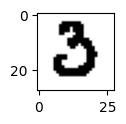

Actual Label: 4, Predicted Label: 1


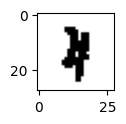

Actual Label: 5, Predicted Label: 3


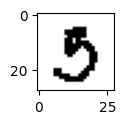

Actual Label: 9, Predicted Label: 4


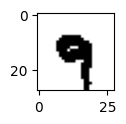

Actual Label: 9, Predicted Label: 5


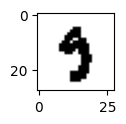

Actual Label: 2, Predicted Label: 7


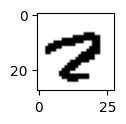

Actual Label: 7, Predicted Label: 1


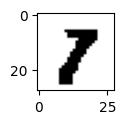

Actual Label: 5, Predicted Label: 8


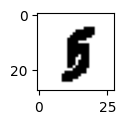

Actual Label: 9, Predicted Label: 0


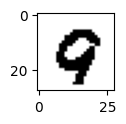

Actual Label: 5, Predicted Label: 8


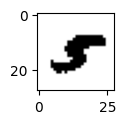

Actual Label: 3, Predicted Label: 7


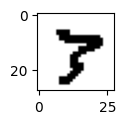

Actual Label: 4, Predicted Label: 9


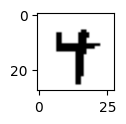

Actual Label: 5, Predicted Label: 4


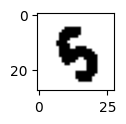

Actual Label: 3, Predicted Label: 7


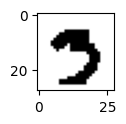

Actual Label: 2, Predicted Label: 3


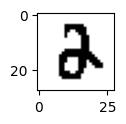

Actual Label: 5, Predicted Label: 9


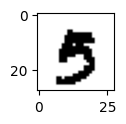

Actual Label: 5, Predicted Label: 8


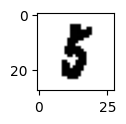

Actual Label: 5, Predicted Label: 7


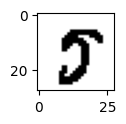

Actual Label: 9, Predicted Label: 4


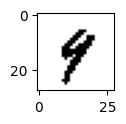

Actual Label: 5, Predicted Label: 6


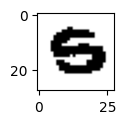

Actual Label: 8, Predicted Label: 5


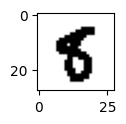

Actual Label: 0, Predicted Label: 2


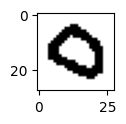

Actual Label: 9, Predicted Label: 4


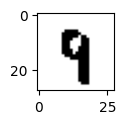

Actual Label: 7, Predicted Label: 9


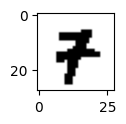

Actual Label: 7, Predicted Label: 3


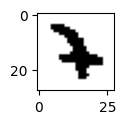

Actual Label: 3, Predicted Label: 7


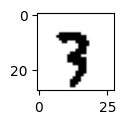

Actual Label: 6, Predicted Label: 0


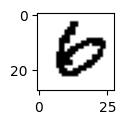

Actual Label: 2, Predicted Label: 7


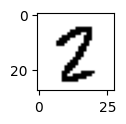

Actual Label: 9, Predicted Label: 7


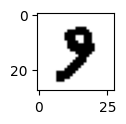

Actual Label: 8, Predicted Label: 0


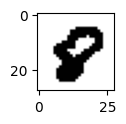

Actual Label: 0, Predicted Label: 3


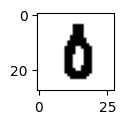

Actual Label: 8, Predicted Label: 7


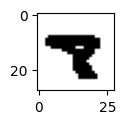

Actual Label: 7, Predicted Label: 8


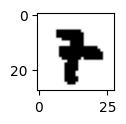

Actual Label: 9, Predicted Label: 1


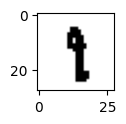

Actual Label: 2, Predicted Label: 7


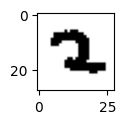

Actual Label: 8, Predicted Label: 3


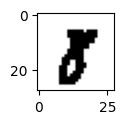

Actual Label: 7, Predicted Label: 8


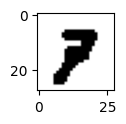

Actual Label: 3, Predicted Label: 5


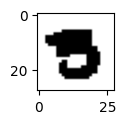

Actual Label: 4, Predicted Label: 9


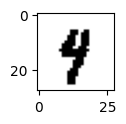

Actual Label: 6, Predicted Label: 2


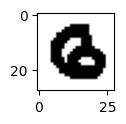

Actual Label: 4, Predicted Label: 2


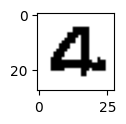

Actual Label: 7, Predicted Label: 9


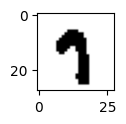

Actual Label: 5, Predicted Label: 8


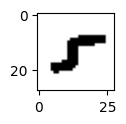

Actual Label: 8, Predicted Label: 4


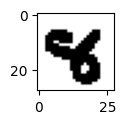

Actual Label: 2, Predicted Label: 4


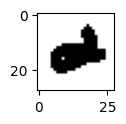

Actual Label: 3, Predicted Label: 5


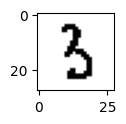

Actual Label: 9, Predicted Label: 4


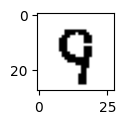

Actual Label: 8, Predicted Label: 9


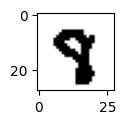

Actual Label: 8, Predicted Label: 3


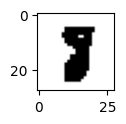

Actual Label: 8, Predicted Label: 3


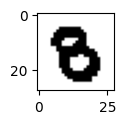

Actual Label: 7, Predicted Label: 2


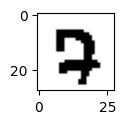

Actual Label: 6, Predicted Label: 1


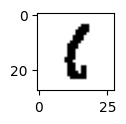

Actual Label: 5, Predicted Label: 7


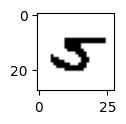

Actual Label: 8, Predicted Label: 0


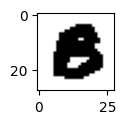

Actual Label: 8, Predicted Label: 7


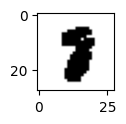

Actual Label: 9, Predicted Label: 4


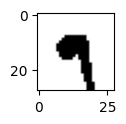

Actual Label: 8, Predicted Label: 6


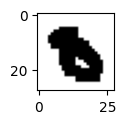

Actual Label: 4, Predicted Label: 6


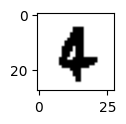

Actual Label: 9, Predicted Label: 8


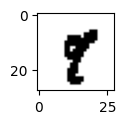

Actual Label: 3, Predicted Label: 8


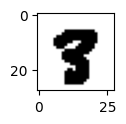

Actual Label: 8, Predicted Label: 0


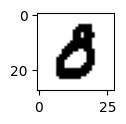

Actual Label: 3, Predicted Label: 5


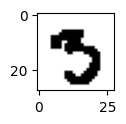

Actual Label: 6, Predicted Label: 0


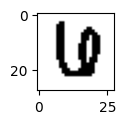

Actual Label: 9, Predicted Label: 4


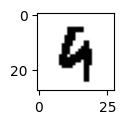

Actual Label: 8, Predicted Label: 3


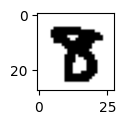

Actual Label: 7, Predicted Label: 2


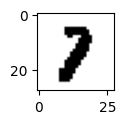

Actual Label: 6, Predicted Label: 5


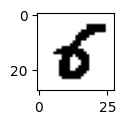

Actual Label: 8, Predicted Label: 9


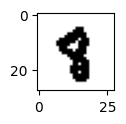

Actual Label: 9, Predicted Label: 0


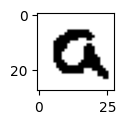

Actual Label: 2, Predicted Label: 4


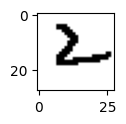

Actual Label: 8, Predicted Label: 4


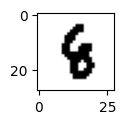

Actual Label: 0, Predicted Label: 8


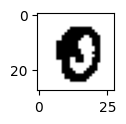

Actual Label: 7, Predicted Label: 1


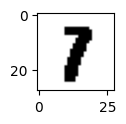

Actual Label: 8, Predicted Label: 6


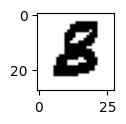

Actual Label: 4, Predicted Label: 9


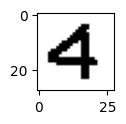

Actual Label: 9, Predicted Label: 4


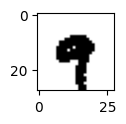

Actual Label: 5, Predicted Label: 8


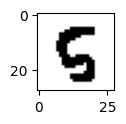

Actual Label: 2, Predicted Label: 3


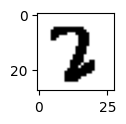

Actual Label: 2, Predicted Label: 7


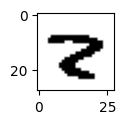

Actual Label: 2, Predicted Label: 3


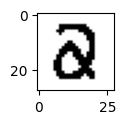

Actual Label: 6, Predicted Label: 5


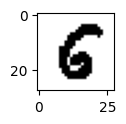

Actual Label: 8, Predicted Label: 4


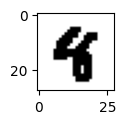

Actual Label: 7, Predicted Label: 1


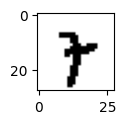

Actual Label: 9, Predicted Label: 7


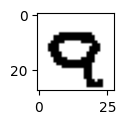

Actual Label: 8, Predicted Label: 7


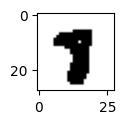

Actual Label: 3, Predicted Label: 1


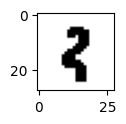

Actual Label: 9, Predicted Label: 4


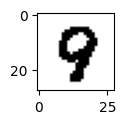

Actual Label: 9, Predicted Label: 4


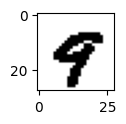

Actual Label: 3, Predicted Label: 2


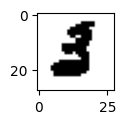

Actual Label: 3, Predicted Label: 2


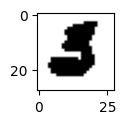

Actual Label: 8, Predicted Label: 1


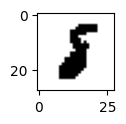

Actual Label: 3, Predicted Label: 2


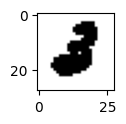

Actual Label: 4, Predicted Label: 1


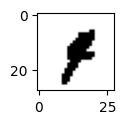

Actual Label: 3, Predicted Label: 2


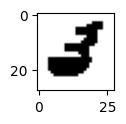

Actual Label: 2, Predicted Label: 9


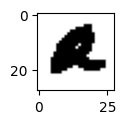

Actual Label: 9, Predicted Label: 4


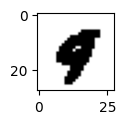

Actual Label: 9, Predicted Label: 4


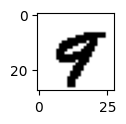

Actual Label: 8, Predicted Label: 5


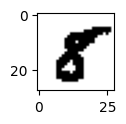

Actual Label: 3, Predicted Label: 2


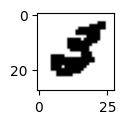

Actual Label: 3, Predicted Label: 2


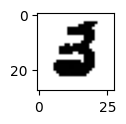

Actual Label: 8, Predicted Label: 4


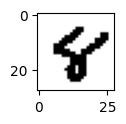

Actual Label: 8, Predicted Label: 4


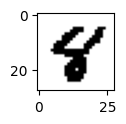

Actual Label: 9, Predicted Label: 7


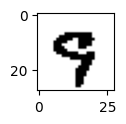

Actual Label: 2, Predicted Label: 8


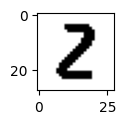

Actual Label: 7, Predicted Label: 2


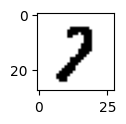

Actual Label: 8, Predicted Label: 9


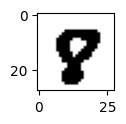

Actual Label: 8, Predicted Label: 0


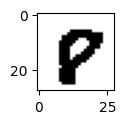

Actual Label: 8, Predicted Label: 0


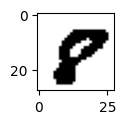

Actual Label: 1, Predicted Label: 6


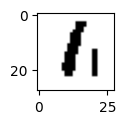

Actual Label: 8, Predicted Label: 9


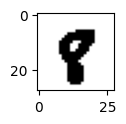

Actual Label: 2, Predicted Label: 8


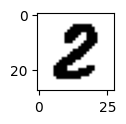

Actual Label: 7, Predicted Label: 9


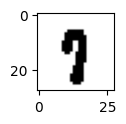

Actual Label: 8, Predicted Label: 4


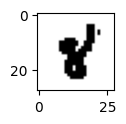

Actual Label: 7, Predicted Label: 9


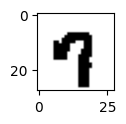

Actual Label: 1, Predicted Label: 5


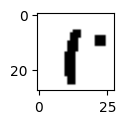

Actual Label: 7, Predicted Label: 9


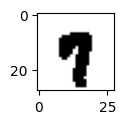

Actual Label: 4, Predicted Label: 6


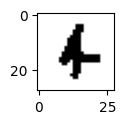

Actual Label: 8, Predicted Label: 5


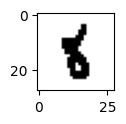

Actual Label: 7, Predicted Label: 9


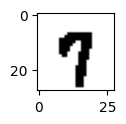

Actual Label: 6, Predicted Label: 4


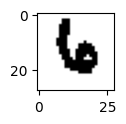

Actual Label: 7, Predicted Label: 9


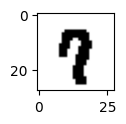

Actual Label: 3, Predicted Label: 7


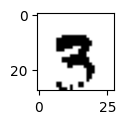

Actual Label: 8, Predicted Label: 6


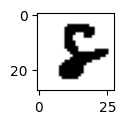

Actual Label: 8, Predicted Label: 6


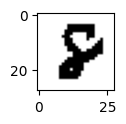

Actual Label: 5, Predicted Label: 3


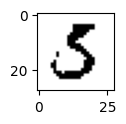

Actual Label: 7, Predicted Label: 9


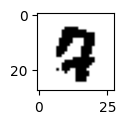

Actual Label: 5, Predicted Label: 3


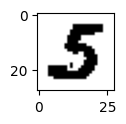

Actual Label: 5, Predicted Label: 3


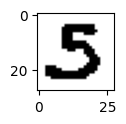

Actual Label: 5, Predicted Label: 3


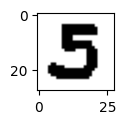

Actual Label: 5, Predicted Label: 3


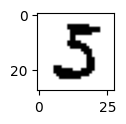

Actual Label: 7, Predicted Label: 0


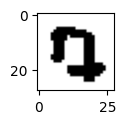

Actual Label: 4, Predicted Label: 0


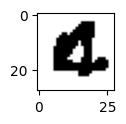

Actual Label: 5, Predicted Label: 2


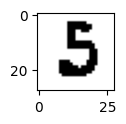

Actual Label: 3, Predicted Label: 0


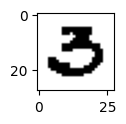

Actual Label: 5, Predicted Label: 3


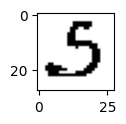

Actual Label: 5, Predicted Label: 3


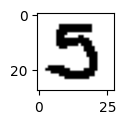

Actual Label: 4, Predicted Label: 9


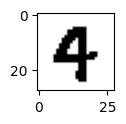

Actual Label: 4, Predicted Label: 9


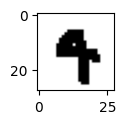

Actual Label: 5, Predicted Label: 3


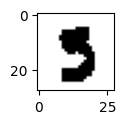

Actual Label: 3, Predicted Label: 8


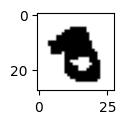

Actual Label: 5, Predicted Label: 3


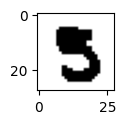

Actual Label: 3, Predicted Label: 8


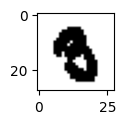

Actual Label: 5, Predicted Label: 3


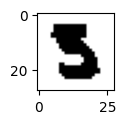

Actual Label: 5, Predicted Label: 8


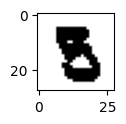

Actual Label: 3, Predicted Label: 5


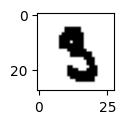

Actual Label: 2, Predicted Label: 0


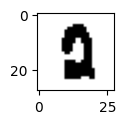

Actual Label: 5, Predicted Label: 3


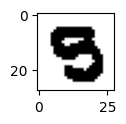

Actual Label: 5, Predicted Label: 8


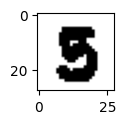

Actual Label: 3, Predicted Label: 9


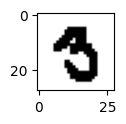

Actual Label: 3, Predicted Label: 8


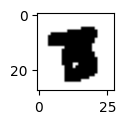

Actual Label: 9, Predicted Label: 3


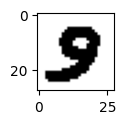

Actual Label: 9, Predicted Label: 5


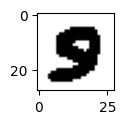

Actual Label: 9, Predicted Label: 8


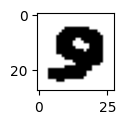

Actual Label: 2, Predicted Label: 8


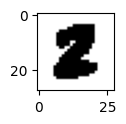

Actual Label: 2, Predicted Label: 6


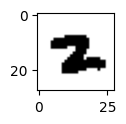

Actual Label: 2, Predicted Label: 8


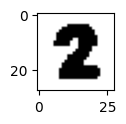

Actual Label: 9, Predicted Label: 0


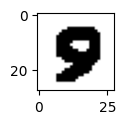

Actual Label: 9, Predicted Label: 8


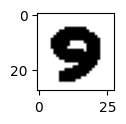

Actual Label: 9, Predicted Label: 8


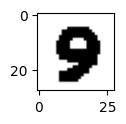

Actual Label: 9, Predicted Label: 0


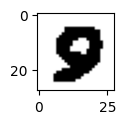

Actual Label: 5, Predicted Label: 8


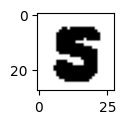

Actual Label: 9, Predicted Label: 3


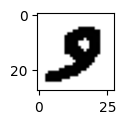

Actual Label: 9, Predicted Label: 5


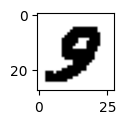

Actual Label: 9, Predicted Label: 0


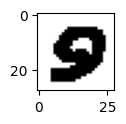

Actual Label: 9, Predicted Label: 0


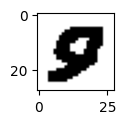

Actual Label: 8, Predicted Label: 3


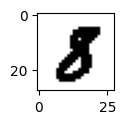

Actual Label: 5, Predicted Label: 6


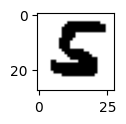

Actual Label: 8, Predicted Label: 6


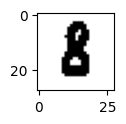

Actual Label: 5, Predicted Label: 2


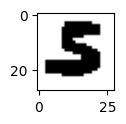

Actual Label: 2, Predicted Label: 6


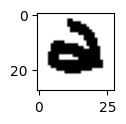

Actual Label: 2, Predicted Label: 4


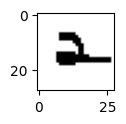

Actual Label: 3, Predicted Label: 2


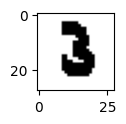

Actual Label: 6, Predicted Label: 2


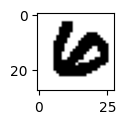

Actual Label: 0, Predicted Label: 6


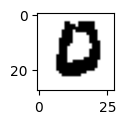

Actual Label: 3, Predicted Label: 8


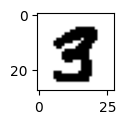

Actual Label: 8, Predicted Label: 5


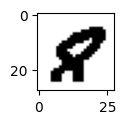

Actual Label: 9, Predicted Label: 0


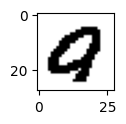

Actual Label: 3, Predicted Label: 0


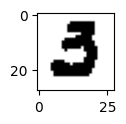

Actual Label: 8, Predicted Label: 7


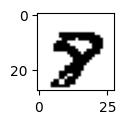

Actual Label: 9, Predicted Label: 3


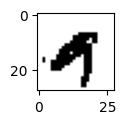

Actual Label: 3, Predicted Label: 7


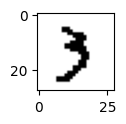

Actual Label: 9, Predicted Label: 4


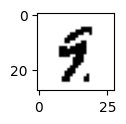

Actual Label: 3, Predicted Label: 1


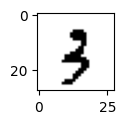

Actual Label: 9, Predicted Label: 7


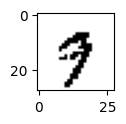

Actual Label: 2, Predicted Label: 6


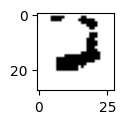

Actual Label: 7, Predicted Label: 1


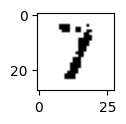

Actual Label: 7, Predicted Label: 1


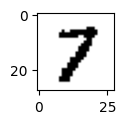

Actual Label: 8, Predicted Label: 1


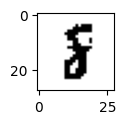

Actual Label: 0, Predicted Label: 7


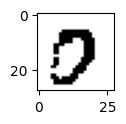

Actual Label: 5, Predicted Label: 6


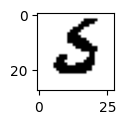

Actual Label: 8, Predicted Label: 7


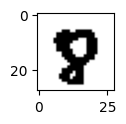

Actual Label: 9, Predicted Label: 4


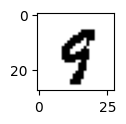

Actual Label: 6, Predicted Label: 4


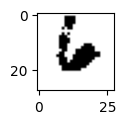

Actual Label: 3, Predicted Label: 5


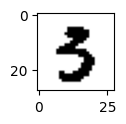

Actual Label: 8, Predicted Label: 7


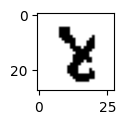

Actual Label: 9, Predicted Label: 5


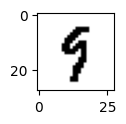

Actual Label: 8, Predicted Label: 5


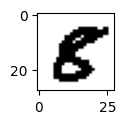

Actual Label: 9, Predicted Label: 4


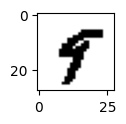

Actual Label: 0, Predicted Label: 2


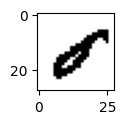

Actual Label: 5, Predicted Label: 7


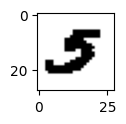

Actual Label: 2, Predicted Label: 4


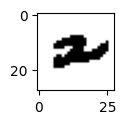

Actual Label: 9, Predicted Label: 0


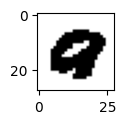

Actual Label: 2, Predicted Label: 6


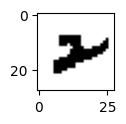

Actual Label: 5, Predicted Label: 4


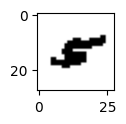

Actual Label: 7, Predicted Label: 2


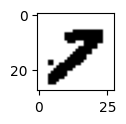

Actual Label: 9, Predicted Label: 4


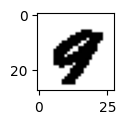

Actual Label: 5, Predicted Label: 1


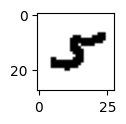

Actual Label: 2, Predicted Label: 4


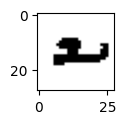

Actual Label: 2, Predicted Label: 7


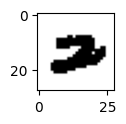

Actual Label: 5, Predicted Label: 6


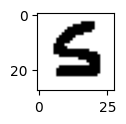

Actual Label: 6, Predicted Label: 4


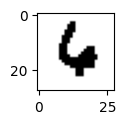

Actual Label: 4, Predicted Label: 2


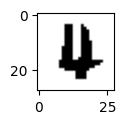

Actual Label: 0, Predicted Label: 3


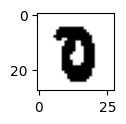

Actual Label: 2, Predicted Label: 6


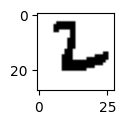

Actual Label: 9, Predicted Label: 7


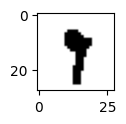

Actual Label: 6, Predicted Label: 4


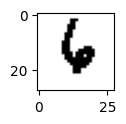

Actual Label: 8, Predicted Label: 9


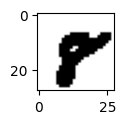

Actual Label: 5, Predicted Label: 6


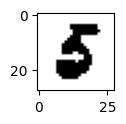

Actual Label: 8, Predicted Label: 3


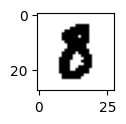

Actual Label: 8, Predicted Label: 9


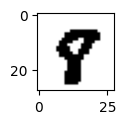

Actual Label: 8, Predicted Label: 9


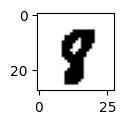

Actual Label: 3, Predicted Label: 9


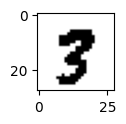

Actual Label: 4, Predicted Label: 9


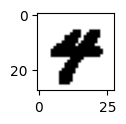

Actual Label: 2, Predicted Label: 4


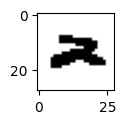

Actual Label: 8, Predicted Label: 3


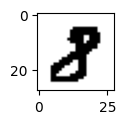

Actual Label: 3, Predicted Label: 5


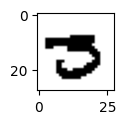

Actual Label: 2, Predicted Label: 9


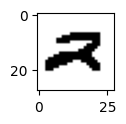

Actual Label: 5, Predicted Label: 4


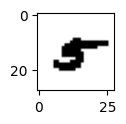

Actual Label: 8, Predicted Label: 3


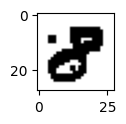

Actual Label: 5, Predicted Label: 3


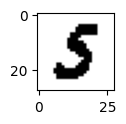

Actual Label: 4, Predicted Label: 8


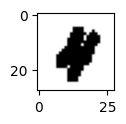

Actual Label: 5, Predicted Label: 3


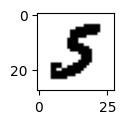

Actual Label: 7, Predicted Label: 2


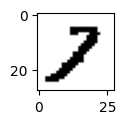

Actual Label: 4, Predicted Label: 8


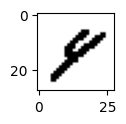

Actual Label: 3, Predicted Label: 8


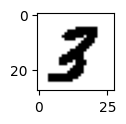

Actual Label: 5, Predicted Label: 1


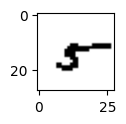

Actual Label: 9, Predicted Label: 5


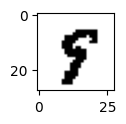

Actual Label: 4, Predicted Label: 8


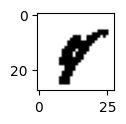

Actual Label: 2, Predicted Label: 7


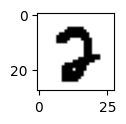

Actual Label: 5, Predicted Label: 3


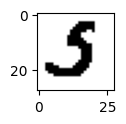

Actual Label: 2, Predicted Label: 8


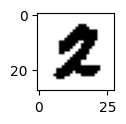

Actual Label: 5, Predicted Label: 4


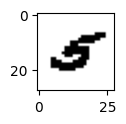

Actual Label: 5, Predicted Label: 1


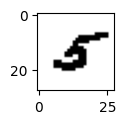

Actual Label: 9, Predicted Label: 4


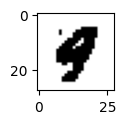

Actual Label: 9, Predicted Label: 4


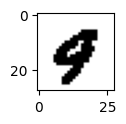

Actual Label: 8, Predicted Label: 5


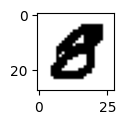

Actual Label: 2, Predicted Label: 3


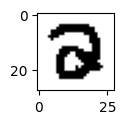

Actual Label: 5, Predicted Label: 8


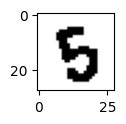

Actual Label: 2, Predicted Label: 6


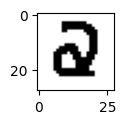

Actual Label: 5, Predicted Label: 3


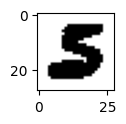

Actual Label: 5, Predicted Label: 2


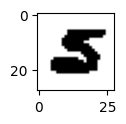

Actual Label: 5, Predicted Label: 2


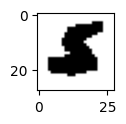

Actual Label: 3, Predicted Label: 2


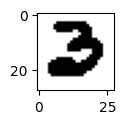

Actual Label: 1, Predicted Label: 8


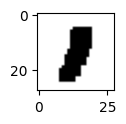

Actual Label: 3, Predicted Label: 2


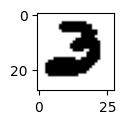

Actual Label: 5, Predicted Label: 8


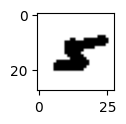

Actual Label: 1, Predicted Label: 8


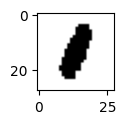

Actual Label: 5, Predicted Label: 8


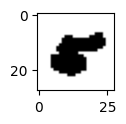

Actual Label: 1, Predicted Label: 8


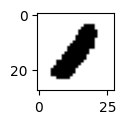

Actual Label: 3, Predicted Label: 9


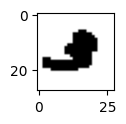

Actual Label: 5, Predicted Label: 4


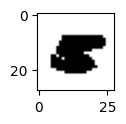

Actual Label: 1, Predicted Label: 8


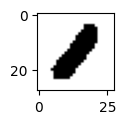

Actual Label: 2, Predicted Label: 4


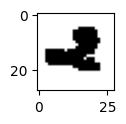

Actual Label: 3, Predicted Label: 2


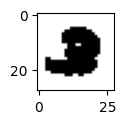

Actual Label: 5, Predicted Label: 4


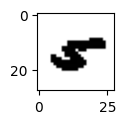

Actual Label: 5, Predicted Label: 4


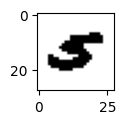

Actual Label: 2, Predicted Label: 4


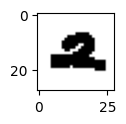

Actual Label: 2, Predicted Label: 9


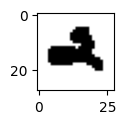

Actual Label: 5, Predicted Label: 4


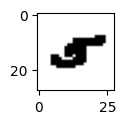

Actual Label: 1, Predicted Label: 8


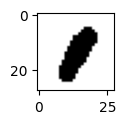

Actual Label: 1, Predicted Label: 8


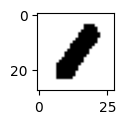

Actual Label: 7, Predicted Label: 9


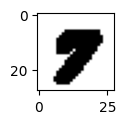

Actual Label: 3, Predicted Label: 2


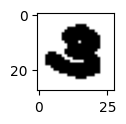

Actual Label: 7, Predicted Label: 9


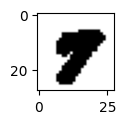

Actual Label: 2, Predicted Label: 4


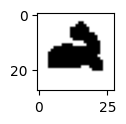

Actual Label: 5, Predicted Label: 6


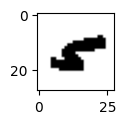

Actual Label: 1, Predicted Label: 8


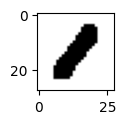

Actual Label: 1, Predicted Label: 8


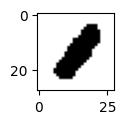

Actual Label: 2, Predicted Label: 6


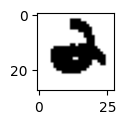

Actual Label: 1, Predicted Label: 8


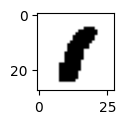

Actual Label: 1, Predicted Label: 8


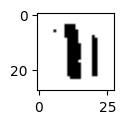

Actual Label: 9, Predicted Label: 7


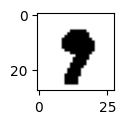

Actual Label: 5, Predicted Label: 8


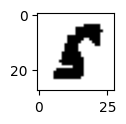

Actual Label: 5, Predicted Label: 3


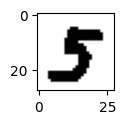

Actual Label: 4, Predicted Label: 6


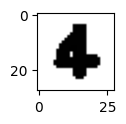

Actual Label: 2, Predicted Label: 8


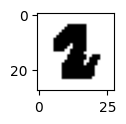

Actual Label: 2, Predicted Label: 8


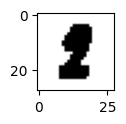

Actual Label: 4, Predicted Label: 6


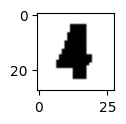

Actual Label: 3, Predicted Label: 8


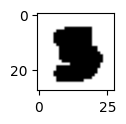

Actual Label: 5, Predicted Label: 3


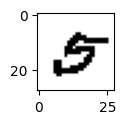

Actual Label: 2, Predicted Label: 4


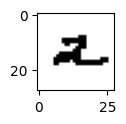

Actual Label: 2, Predicted Label: 4


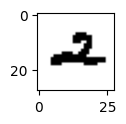

Actual Label: 1, Predicted Label: 2


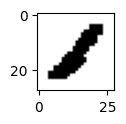

Actual Label: 3, Predicted Label: 5


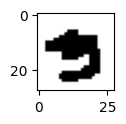

Actual Label: 3, Predicted Label: 8


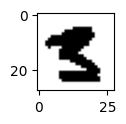

Actual Label: 3, Predicted Label: 5


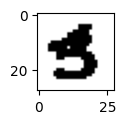

Actual Label: 8, Predicted Label: 4


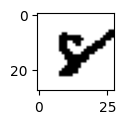

Actual Label: 8, Predicted Label: 5


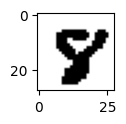

Actual Label: 3, Predicted Label: 5


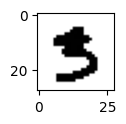

Actual Label: 8, Predicted Label: 6


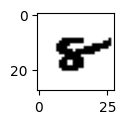

Actual Label: 2, Predicted Label: 4


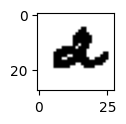

Actual Label: 8, Predicted Label: 6


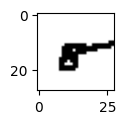

Actual Label: 8, Predicted Label: 6


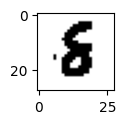

Actual Label: 5, Predicted Label: 4


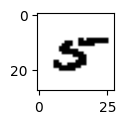

Actual Label: 5, Predicted Label: 8


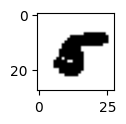

Actual Label: 4, Predicted Label: 9


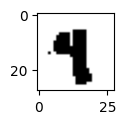

Actual Label: 8, Predicted Label: 6


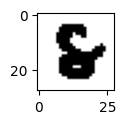

Actual Label: 5, Predicted Label: 3


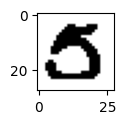

Actual Label: 2, Predicted Label: 0


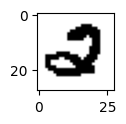

Actual Label: 2, Predicted Label: 3


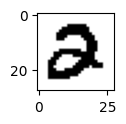

Actual Label: 3, Predicted Label: 8


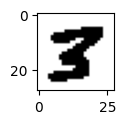

Actual Label: 7, Predicted Label: 2


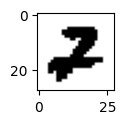

Actual Label: 2, Predicted Label: 8


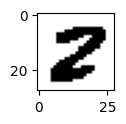

Actual Label: 5, Predicted Label: 6


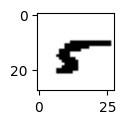

Actual Label: 7, Predicted Label: 2


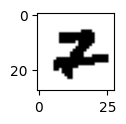

Actual Label: 7, Predicted Label: 2


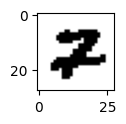

Actual Label: 7, Predicted Label: 2


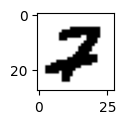

Actual Label: 9, Predicted Label: 4


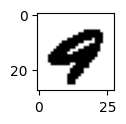

Actual Label: 7, Predicted Label: 2


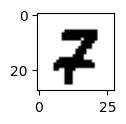

Actual Label: 7, Predicted Label: 2


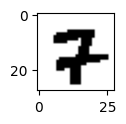

Actual Label: 7, Predicted Label: 2


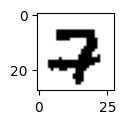

Actual Label: 1, Predicted Label: 8


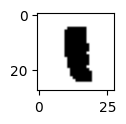

Actual Label: 7, Predicted Label: 4


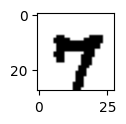

Actual Label: 4, Predicted Label: 9


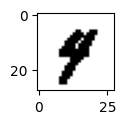

Actual Label: 9, Predicted Label: 4


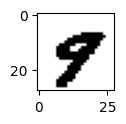

Actual Label: 8, Predicted Label: 5


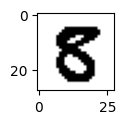

Actual Label: 8, Predicted Label: 5


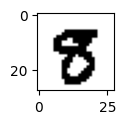

Actual Label: 6, Predicted Label: 4


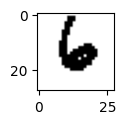

Actual Label: 5, Predicted Label: 3


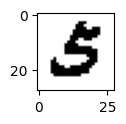

Actual Label: 2, Predicted Label: 4


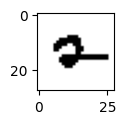

Actual Label: 2, Predicted Label: 7


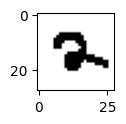

Actual Label: 5, Predicted Label: 3


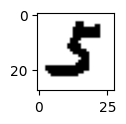

Actual Label: 5, Predicted Label: 3


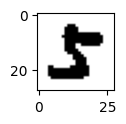

Actual Label: 5, Predicted Label: 4


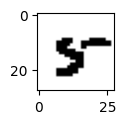

Actual Label: 7, Predicted Label: 1


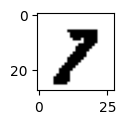

Actual Label: 9, Predicted Label: 4


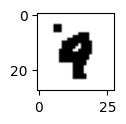

Actual Label: 2, Predicted Label: 6


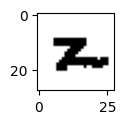

Actual Label: 3, Predicted Label: 5


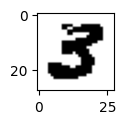

Actual Label: 3, Predicted Label: 8


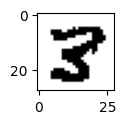

Actual Label: 0, Predicted Label: 3


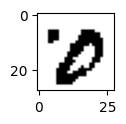

Actual Label: 9, Predicted Label: 7


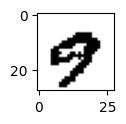

Actual Label: 3, Predicted Label: 7


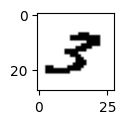

Actual Label: 3, Predicted Label: 2


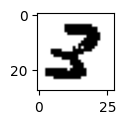

Actual Label: 2, Predicted Label: 7


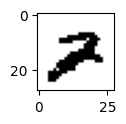

Actual Label: 6, Predicted Label: 5


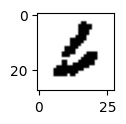

Actual Label: 3, Predicted Label: 8


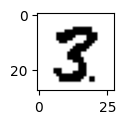

Actual Label: 9, Predicted Label: 7


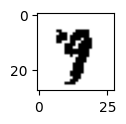

Actual Label: 6, Predicted Label: 5


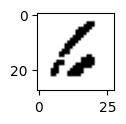

Actual Label: 2, Predicted Label: 1


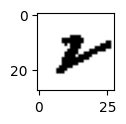

Actual Label: 2, Predicted Label: 0


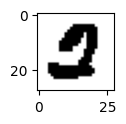

Actual Label: 5, Predicted Label: 0


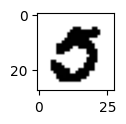

Actual Label: 2, Predicted Label: 0


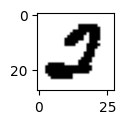

Actual Label: 5, Predicted Label: 6


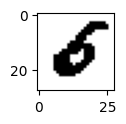

Actual Label: 8, Predicted Label: 5


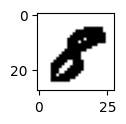

Actual Label: 8, Predicted Label: 1


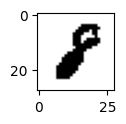

Actual Label: 4, Predicted Label: 2


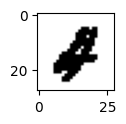

Actual Label: 5, Predicted Label: 6


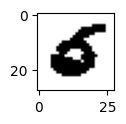

Actual Label: 2, Predicted Label: 0


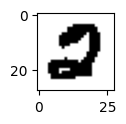

Actual Label: 2, Predicted Label: 0


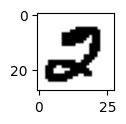

Actual Label: 8, Predicted Label: 5


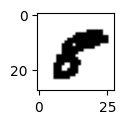

Actual Label: 2, Predicted Label: 0


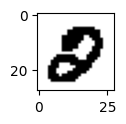

Actual Label: 5, Predicted Label: 0


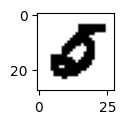

Actual Label: 5, Predicted Label: 0


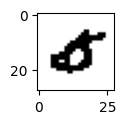

Actual Label: 2, Predicted Label: 0


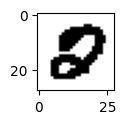

Actual Label: 4, Predicted Label: 1


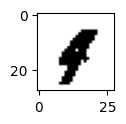

Actual Label: 9, Predicted Label: 4


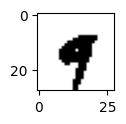

Actual Label: 2, Predicted Label: 8


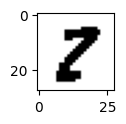

Actual Label: 2, Predicted Label: 8


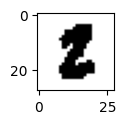

Actual Label: 2, Predicted Label: 7


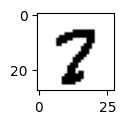

Actual Label: 2, Predicted Label: 8


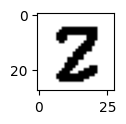

Actual Label: 9, Predicted Label: 5


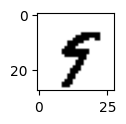

Actual Label: 6, Predicted Label: 3


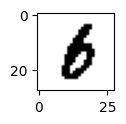

Actual Label: 8, Predicted Label: 1


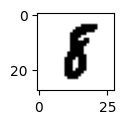

Actual Label: 2, Predicted Label: 8


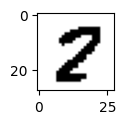

Actual Label: 2, Predicted Label: 8


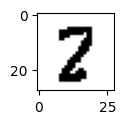

Actual Label: 0, Predicted Label: 2


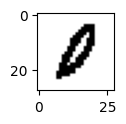

Actual Label: 5, Predicted Label: 6


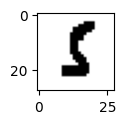

Actual Label: 9, Predicted Label: 4


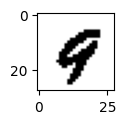

Actual Label: 9, Predicted Label: 4


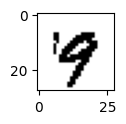

Actual Label: 8, Predicted Label: 6


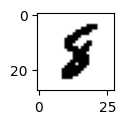

Actual Label: 2, Predicted Label: 8


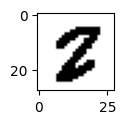

Actual Label: 3, Predicted Label: 7


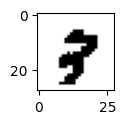

Actual Label: 3, Predicted Label: 7


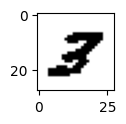

Actual Label: 5, Predicted Label: 6


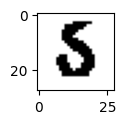

Actual Label: 3, Predicted Label: 5


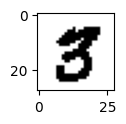

Actual Label: 3, Predicted Label: 8


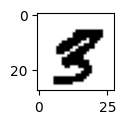

Actual Label: 6, Predicted Label: 0


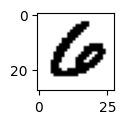

Actual Label: 8, Predicted Label: 7


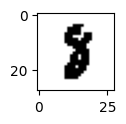

Actual Label: 5, Predicted Label: 3


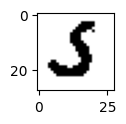

Actual Label: 3, Predicted Label: 2


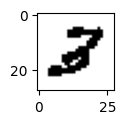

Actual Label: 5, Predicted Label: 6


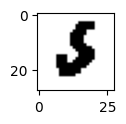

Actual Label: 3, Predicted Label: 8


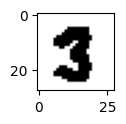

Actual Label: 9, Predicted Label: 4


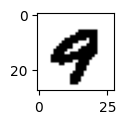

In [24]:
net.eval()

with torch.no_grad():
    for data in testloader:
        images, labels = data

        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)

        predictions = torch.argmax(outputs, dim=1)

        for i in range(data[0].shape[0]):
            pred = predictions[i].item()
            label = labels[i]
            if(label != pred):
                print(f'Actual Label: {label}, Predicted Label: {pred}')       
                img = np.reshape(images[i].cpu().numpy(),[28,28])
                imshow("", np.uint8(img), size = 1)

### Create confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix


pred_list = torch.zeros(0, dtype=torch.long, device='cpu')
label_list = torch.zeros(0, dtype=torch.long, device='cpu')

with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)

        pred_list = torch.cat([pred_list, preds.view(-1).cpu()])
        label_list = torch.cat([label_list, classes.view(-1).cpu()])

conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())
print(conf_mat)

[[ 956    0    5    4    0    3    7    1    4    0]
 [   0 1107    4    3    0    3    4    0   14    0]
 [  10   10  908   13   19    2   16   21   26    7]
 [   4    4   22  899    0   34    2   21   19    5]
 [   1    5    5    0  915    2   16    1    4   33]
 [  10    4    6   44   13  761   18    8   21    7]
 [   9    5    5    2   15   16  903    1    2    0]
 [   3   18   33    3   10    0    0  930    3   28]
 [   9    9    9   33   13   28   12   12  834   15]
 [  11    6    8   11   41   10    0   20    8  894]]


### Make it beautiful

In [26]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

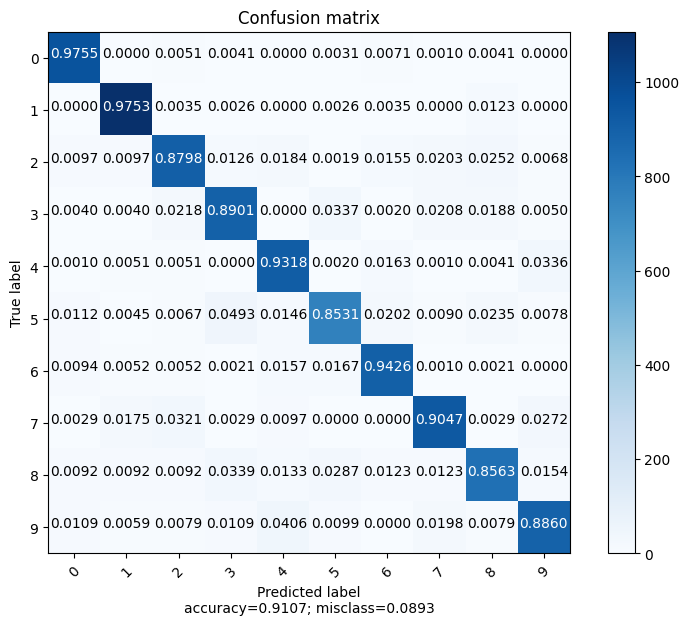

In [27]:
target_names = list(range(0,10))
plot_confusion_matrix(conf_mat, target_names)

## 5. Evaluating Class Accuracy
- Calculate the accuracy of each individual class based on the confusion matrix.
- Assess the model's performance for each digit class.

## 6. Generating the Classification Report
- Import `sklearn.metrics.classification_report`.
- Convert the ground truth and prediction labels to NumPy arrays.
- Use `classification_report()` to generate the report, including precision, recall, F1-score, and support for each class.
- Interpret the classification report and understand precision, recall, and other metrics.

### Accuracy for each class

In [28]:
class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1)

for (i,ca) in enumerate(class_accuracy):
    print(f'Accuracy for {i} : {ca:.3f}%')

Accuracy for 0 : 97.551%
Accuracy for 1 : 97.533%
Accuracy for 2 : 87.984%
Accuracy for 3 : 89.010%
Accuracy for 4 : 93.177%
Accuracy for 5 : 85.314%
Accuracy for 6 : 94.259%
Accuracy for 7 : 90.467%
Accuracy for 8 : 85.626%
Accuracy for 9 : 88.603%


### Generate Classification report

In [29]:
from sklearn.metrics import classification_report

print(classification_report(label_list.numpy(), pred_list.numpy()))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.95      0.98      0.96      1135
           2       0.90      0.88      0.89      1032
           3       0.89      0.89      0.89      1010
           4       0.89      0.93      0.91       982
           5       0.89      0.85      0.87       892
           6       0.92      0.94      0.93       958
           7       0.92      0.90      0.91      1028
           8       0.89      0.86      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

